# ML Fall 2023 - Predicting Smoking Status using Bio-Signals 

### Luke Flannigan

# Project Summary

This machine learning project aimed to predict smoking status using health indicators, participating in a [Kaggle](https://www.kaggle.com/competitions/playground-series-s3e24) competition where models were assessed based on the AUC-ROC metric for binary classification. The approach included using Kaggle-provided datasets, which contained comprehensive health data and individuals' smoking statuses. A notable improvement in the model's accuracy was achieved by integrating Kaggle's training dataset with the original dataset from which it was derived.

In the data analysis and preprocessing phase, extensive Exploratory Data Analysis (EDA) was conducted, revealing the absence of missing values. The decision to remove categorical features was made after determining their low feature importance, which simplified the model and enhanced its performance. Numeric features were standardized for consistency throughout the dataset. Despite extensive experimentation with various feature combinations and the development of new features, no significant improvement in the model's performance was observed. 

The project involved the testing and optimization of multiple machine learning models, including Logistic Regression, Random Forest, XGBoost, LightGBM, and CatBoost. These were evaluated using a training-validation split and stratified k-fold cross-validation. The most promising models — XGBoost, Random Forest, and CatBoost — were further refined using Optuna for hyperparameter optimization.

The final stage of the project produced a weighted ensemble model, combining the optimized XGBoost, Random Forest, and CatBoost models. This approach was selected to exploit the strengths of each model, culminating in a respectable performance on the Kaggle leaderboard with a final score of 0.871. This project demonstrates the practical application of machine learning in a competitive environment, focusing on the nuanced analysis of health data and the strategic use of different modeling techniques.

# Problem Statement
The core problem is to develop a machine learning model capable of predicting whether a person is a smoker based on various health indicators. This binary classification task requires the model to discern patterns contained within various health metrics to accurately classify individuals as smokers or non-smokers. The challenge lies in handling a diverse range of bio-signal data and effectively utilizing them to make reliable predictions.

### Benchmark
The benchmark for this project is set by the Kaggle competition's guidelines, which specify the Area Under the ROC Curve (AUC-ROC) as the evaluation metric. The choice of AUC-ROC is guided by the nature of the competition (binary classification) and its efficacy in measuring the model's ability to distinguish between the two classes accurately.

### Data Origin and Characteristics
The datasets used are sourced from [Kaggle](https://www.kaggle.com/competitions/playground-series-s3e24/data):
- `train.csv`: A synthetic dataset with 159,256 entries, including 22 health-related features plus the binary target 'smoking'.
- `test.csv`: Comprising 106,171 entries, mirroring the training set but excluding the target variable.
- `original_data`: The original train dataset with 38,984 entries mirroring the train dataset. It is combined with train.csv for enhanced model training.

These datasets feature a mix of continuous variables as well as categorical variables like the target variable smoking. Despite the synthetic nature of the train.csv and test.csv datasets, they are the primary sources for training and validating the model.

### Informal Success Measures
In evaluating the model's performance, while the primary metric used was the AUC-ROC score, additional metrics such as the F1 score were also considered. Additionally, a confusion matrix was utilized to gain deeper insights into the model's classification capabilities. These supplementary metrics offered a more complete view of the model's effectiveness, extending beyond the primary AUC-ROC evaluation to include aspects of precision, recall, and overall classification accuracy.

### Project Goals
The primary goal is to construct a model that achieves a high AUC-ROC score and perhaps discover how different health indicators can influence smoking status. Beyond the technical aspect of modeling, this project serves as a valuable opportunity to enhance my skills and experience in data science and machine learning. Additionally, I would like to place as high as possible on the Kaggle competition leaderboard, recognizing that while this placement is a measure of success, the primary focus remains on learning and applying machine learning techniques to a real-world problem.

# Detailed Dataset Overview
The data for this competition includes three main files:
- `train.csv`: This file contains the training data, including a range of health indicators and the binary target variable 'smoking'. 
- `test.csv`: Similar to the training data, but it does not include the target variable. The predictions made on this dataset will be evaluated by Kaggle to determine the model's performance.
- `original_data.csv`: The original dataset that was used by the deep learning model to generate the `train.csv` and `test.csv` files. It includes a complete set of features and the target variable.


### Features Description
The datasets consist of 23 features, 22 of which offer insights into a patient's health:
- `id`: Unique identifier for each person. Not useful in predicting smoking status
- `age`: Person's age.
- `height(cm)`: Height in centimeters.
- `weight(kg)`: Weight in kilograms.
- `waist(cm)`: Waist measurement in centimeters.
- `eyesight(left)`: Eyesight measure for the left eye.
- `eyesight(right)`: Eyesight measure for the right eye.
- `hearing(left)`: Hearing ability in the left ear.
- `hearing(right)`: Hearing ability in the right ear.
- `systolic`: Systolic blood pressure.
- `relaxation`: Diastolic blood pressure.
- `fasting blood sugar`: Blood sugar level after fasting.
- `Cholesterol`: Total cholesterol level.
- `triglyceride`: Triglyceride levels.
- `HDL`: High-density lipoprotein cholesterol.
- `LDL`: Low-density lipoprotein cholesterol.
- `hemoglobin`: Hemoglobin levels in the blood.
- `Urine protein`: Presence of protein in urine.
- `serum creatinine`: Level of creatinine in the blood.
- `AST`: Aspartate aminotransferase enzyme level.
- `ALT`: Alanine aminotransferase enzyme level.
- `Gtp`: Gamma-glutamyl transferase enzyme level.
- `dental caries`: Presence of dental cavities.

Only included in the train dataset is the target variable
- `smoking`: Whether or not the person is a smoker.

### Dataset Scale
- The `train.csv` dataset contains 159,256 entries.
- The `test.csv` dataset comprises 106,171 entries.
- The `original_data` comprises 38,984 entries.

### Data Processing Details
**Concatenation**: The train dataset was concatenated with the original smoking dataset to enrich the training data.

**Processing/Cleaning/Labeling**: The datasets were already in a clean state, so minimal processing was required. The straightforward nature of the data allowed for more focus on the modeling and evaluation stages of the project, rather than extensive data cleaning or preprocessing.

## Importing Necessary Libraries

In [14]:
# Data handling 
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Evaluation Metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Hyperparameter optimization
import optuna

# Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

## Loading the Data

Here the datasets are loaded and the Kaggle train set and original smoking dataset are concatenated to produce a more comprehensize training set. In my own experimentation this improved the models performance. I dropped the 'id' column in both train and test as it does not serve any value as a predictor of smoking. 

In [15]:
# Loading the datasets
train = pd.read_csv('./smoking_data/train.csv')
test = pd.read_csv('./smoking_data/test.csv')

train = train.drop(['id'], axis=1)
test = test.drop(['id'], axis=1)

# Loading original dataset
original_data = pd.read_csv('./smoking_data/train_dataset.csv') 

#Combining original dataset with Kaggle dataset 
train = pd.concat([original_data, train])

train.reset_index(drop=True, inplace=True)

## Initial Data Exploration
In this section, the dataset is explored to gain an initial understanding and prepare for more in-depth analysis. The steps include:

- Displaying the first few rows of the training and testing datasets.
- Reviewing data types in the training dataset.
- Examining statistical summaries of the training dataset's features.
- Checking the number of rows and columns in both datasets.
- Identifying the number of unique values in each feature of the training dataset.
- Assessing if there are missing values in the training dataset.

In [16]:
train.head(10)

age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  eyesight(right)  \
0   35         170          85       97.0             0.9              0.9   
1   20         175         110      110.0             0.7              0.9   
2   45         155          65       86.0             0.9              0.9   
3   45         165          80       94.0             0.8              0.7   
4   20         165          60       81.0             1.5              0.1   
5   60         160          50       78.0             1.0              0.9   
6   40         175          90       95.0             0.9              1.0   
7   40         180          75       85.0             1.5              1.5   
8   40         170          60       74.0             1.2              1.5   
9   45         155          55       78.0             0.7              1.0   

   hearing(left)  hearing(right)  systolic  relaxation  ...  HDL  LDL  \
0              1               1       118          78  ...   70  142   
1              1               1       119          79  ...   71  114   
2              1               1       110          80  ...   57  112   
3              1               1       158          88  ...   46   91   
4              1               1       109          64  ...   47   92   
5              2               2       126          75  ...   98   64   
6              1               1       130          88  ...   39  102   
7              1               1       110          60  ...   58   99   
8              1               1        89          57  ...   60  104   
9              1               1       114          81  ...   41  107   

   hemoglobin  Urine protein  serum creatinine   AST   ALT  Gtp  \
0        19.8              1               1.0    61   115  125   
1        15.9              1               1.1    19    25   30   
2        13.7              3               0.6  1090  1400  276   
3        16.9              1               0.9    32    36   36   
4        14.9              1               1.2    26    28   15   
5        13.9              1               1.0    47    23   70   
6        16.5              1               1.0    19    22   19   
7        14.0              2               1.4    29    20   32   
8        12.9              2               0.7    17    17   14   
9        13.1              1               0.6    22    15   56   

   dental caries  smoking  
0              1        1  
1              1        0  
2              0        0  
3              0        0  
4              0        0  
5              0        1  
6              0        0  
7              1        1  
8              0        0  
9              0        0  

[10 rows x 23 columns]

In [17]:
test.head()

age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  eyesight(right)  \
0   40         165          70       84.0             1.2              1.2   
1   80         160          60       93.0             1.0              1.0   
2   60         170          70       86.5             0.6              0.7   
3   40         160          50       67.0             0.3              0.4   
4   40         170          75       89.4             1.0              0.9   

   hearing(left)  hearing(right)  systolic  relaxation  ...  triglyceride  \
0              1               1       130          89  ...           186   
1              2               2       144          72  ...           158   
2              1               1       117          75  ...           173   
3              1               1       116          62  ...            47   
4              1               1       132          94  ...           100   

   HDL  LDL  hemoglobin  Urine protein  serum creatinine  AST  ALT  Gtp  \
0   49  115        14.2              1               0.9   19   25   32   
1   35  104        13.0              1               1.1   20   12   24   
2   39   88        15.4              1               1.4   38   60   36   
3   75  128        14.5              1               0.6   25   18   10   
4   39  123        16.5              1               1.0   30   39   27   

   dental caries  
0              0  
1              0  
2              0  
3              1  
4              1  

[5 rows x 22 columns]

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198240 entries, 0 to 198239
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  198240 non-null  int64  
 1   height(cm)           198240 non-null  int64  
 2   weight(kg)           198240 non-null  int64  
 3   waist(cm)            198240 non-null  float64
 4   eyesight(left)       198240 non-null  float64
 5   eyesight(right)      198240 non-null  float64
 6   hearing(left)        198240 non-null  int64  
 7   hearing(right)       198240 non-null  int64  
 8   systolic             198240 non-null  int64  
 9   relaxation           198240 non-null  int64  
 10  fasting blood sugar  198240 non-null  int64  
 11  Cholesterol          198240 non-null  int64  
 12  triglyceride         198240 non-null  int64  
 13  HDL                  198240 non-null  int64  
 14  LDL                  198240 non-null  int64  
 15  hemoglobin       

In [19]:
train.describe()

age     height(cm)     weight(kg)      waist(cm)  \
count  198240.000000  198240.000000  198240.000000  198240.000000   
mean       44.271418     165.153375      66.906709      82.817163   
std        11.886308       8.895587      12.656868       9.039363   
min        20.000000     130.000000      30.000000      51.000000   
25%        40.000000     160.000000      55.000000      77.000000   
50%        40.000000     165.000000      65.000000      83.000000   
75%        55.000000     170.000000      75.000000      89.000000   
max        85.000000     190.000000     135.000000     129.000000   

       eyesight(left)  eyesight(right)  hearing(left)  hearing(right)  \
count   198240.000000    198240.000000  198240.000000   198240.000000   
mean         1.007599         1.002519       1.024248        1.023966   
std          0.422827         0.414241       0.153820        0.152943   
min          0.100000         0.100000       1.000000        1.000000   
25%          0.800000         0.800000       1.000000        1.000000   
50%          1.000000         1.000000       1.000000        1.000000   
75%          1.200000         1.200000       1.000000        1.000000   
max          9.900000         9.900000       2.000000        2.000000   

            systolic     relaxation  ...            HDL            LDL  \
count  198240.000000  198240.000000  ...  198240.000000  198240.000000   
mean      122.301488      76.701085  ...      56.135951     114.700858   
std        12.920634       9.135720  ...      14.106668      31.601535   
min        71.000000      40.000000  ...       4.000000       1.000000   
25%       113.000000      70.000000  ...      46.000000      94.000000   
50%       121.000000      77.000000  ...      54.000000     114.000000   
75%       130.000000      82.000000  ...      65.000000     134.000000   
max       233.000000     146.000000  ...     359.000000    1860.000000   

          hemoglobin  Urine protein  serum creatinine            AST  \
count  198240.000000  198240.000000     198240.000000  198240.000000   
mean       14.763003       1.076650          0.891440      25.650847   
std         1.460424       0.359204          0.188198      12.014495   
min         4.900000       1.000000          0.100000       6.000000   
25%        13.800000       1.000000          0.800000      20.000000   
50%        15.000000       1.000000          0.900000      23.000000   
75%        15.800000       1.000000          1.000000      29.000000   
max        21.100000       6.000000         11.600000    1090.000000   

                 ALT            Gtp  dental caries        smoking  
count  198240.000000  198240.000000  198240.000000  198240.000000  
mean       26.667282      36.941455       0.201226       0.423583  
std        21.119268      35.637177       0.400917       0.494127  
min         1.000000       2.000000       0.000000       0.000000  
25%        16.000000      18.000000       0.000000       0.000000  
50%        22.000000      27.000000       0.000000       0.000000  
75%        32.000000      44.000000       0.000000       1.000000  
max      2914.000000     999.000000       1.000000       1.000000  

[8 rows x 23 columns]

In [20]:
print(train.shape)
print(test.shape)

(198240, 23)
(106171, 22)


In [21]:
train.nunique()

age                     18
height(cm)              15
weight(kg)              29
waist(cm)              548
eyesight(left)          20
eyesight(right)         18
hearing(left)            2
hearing(right)           2
systolic               128
relaxation              94
fasting blood sugar    259
Cholesterol            279
triglyceride           393
HDL                    123
LDL                    286
hemoglobin             144
Urine protein            6
serum creatinine        34
AST                    196
ALT                    230
Gtp                    444
dental caries            2
smoking                  2
dtype: int64

Notably low numbers for unique values for age, weight and height due to rounding.

In [22]:
train.isna().sum()

age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

Upon examination using `train.isna.sum()`, it is observed that the dataset contains no null values.

# Exploratory Data Analysis 

Here I focus on a deeper analysis of the data. 

### Graphs Used and Their Justifications

- **Count Plot (Bar Chart) for Target Variable**: For visualizing the distribution of smokers and non-smokers, identifying class imbalance.
- **Grid of Histograms for Continuous Features**: To explore distribution patterns and detect skewness in continuous features.
- **Grid of Bar Charts for Categorical Features**: For examining the frequency distribution of categorical variables.
- **KDE and Box Plots for Numeric Variables with 'Smoking' Hue**: To observe how continuous variables differ between smoker groups.
- **Bar Plots Hued with Smoking for Categorical Variables**: To analyze the relationship between smoking status and categorical variables.
- **Correlation Matrix and Pair Plot**: To identify significant correlations and explore relationships between select features.

### Data Handling and Feature Normalization

- The datasets, being clean and well-structured, required minimal data wrangling. The focus was more on feature selection and testing combinations, which allowed for a targeted approach to model training.
- Feature normalization was initially applied for models like Logistic Regression. Although the final model selection veered towards tree-based models, which are scale-invariant, the decision was made to retain standardized scaling to maintain consistency across different model types. This also kept options open for experimenting with various algorithms during the modeling phase.

### Modeling Approach

- A diverse set of models, including Logistic Regression, Random Forest, XGBoost, LightGBM, CatBoost, and Gradient Boosting, were tested to establish a robust baseline. This variety ensured a comprehensive understanding of each algorithm's performance in handling the dataset.
- The manageable size of the dataset facilitated extensive model experimentation, leading to a focus on fine-tuning the high-performing tree-based and gradient boosting models.
- The final strategy converged on an ensemble model, combining the optimized versions of the best-performing models. This ensemble approach leveraged their collective strengths, enhancing the overall prediction accuracy and robustness of the model.

### Target Variable Analysis: Distribution of Smoking
The bar chart below visualizes the distribution of Smoking status in the dataset.

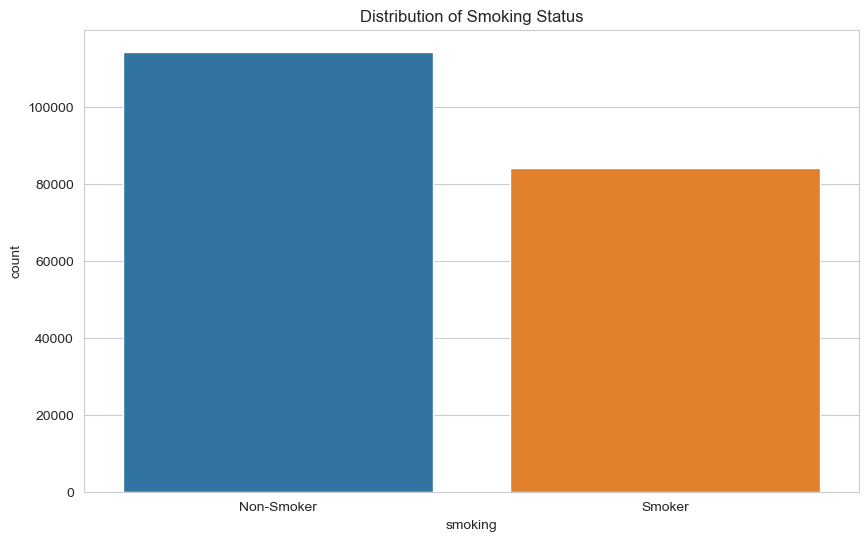

In [23]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.countplot(x='smoking', data=train)
plt.title('Distribution of Smoking Status')
plt.xticks([0,1], ['Non-Smoker', 'Smoker'])
plt.show()

### Analysis of Smoking Distribution
The distribution of Smoking is slightly imbalanced. There are more non-smokers than smokers, but the difference is not too extreme, still it is worth noting.

### Separating Categorical and Numeric Features

I now choose to categorize features as numeric or categorical for streamlined analysis:
- **Categorical Features**: 'dental_caries', 'Urine protein', 'hearing(left)', and 'hearing(right)'.
- **Numeric Features**: Remaining features.

In [24]:
categorical_features = ['dental caries', 'Urine protein', 'hearing(left)', 'hearing(right)']
continuous_features = [col for col in train.columns if col not in categorical_features + ['smoking']]

### Histograms of Numeric Features
Here histograms are created for each numeric feature, providing a visual representation of their distributions.

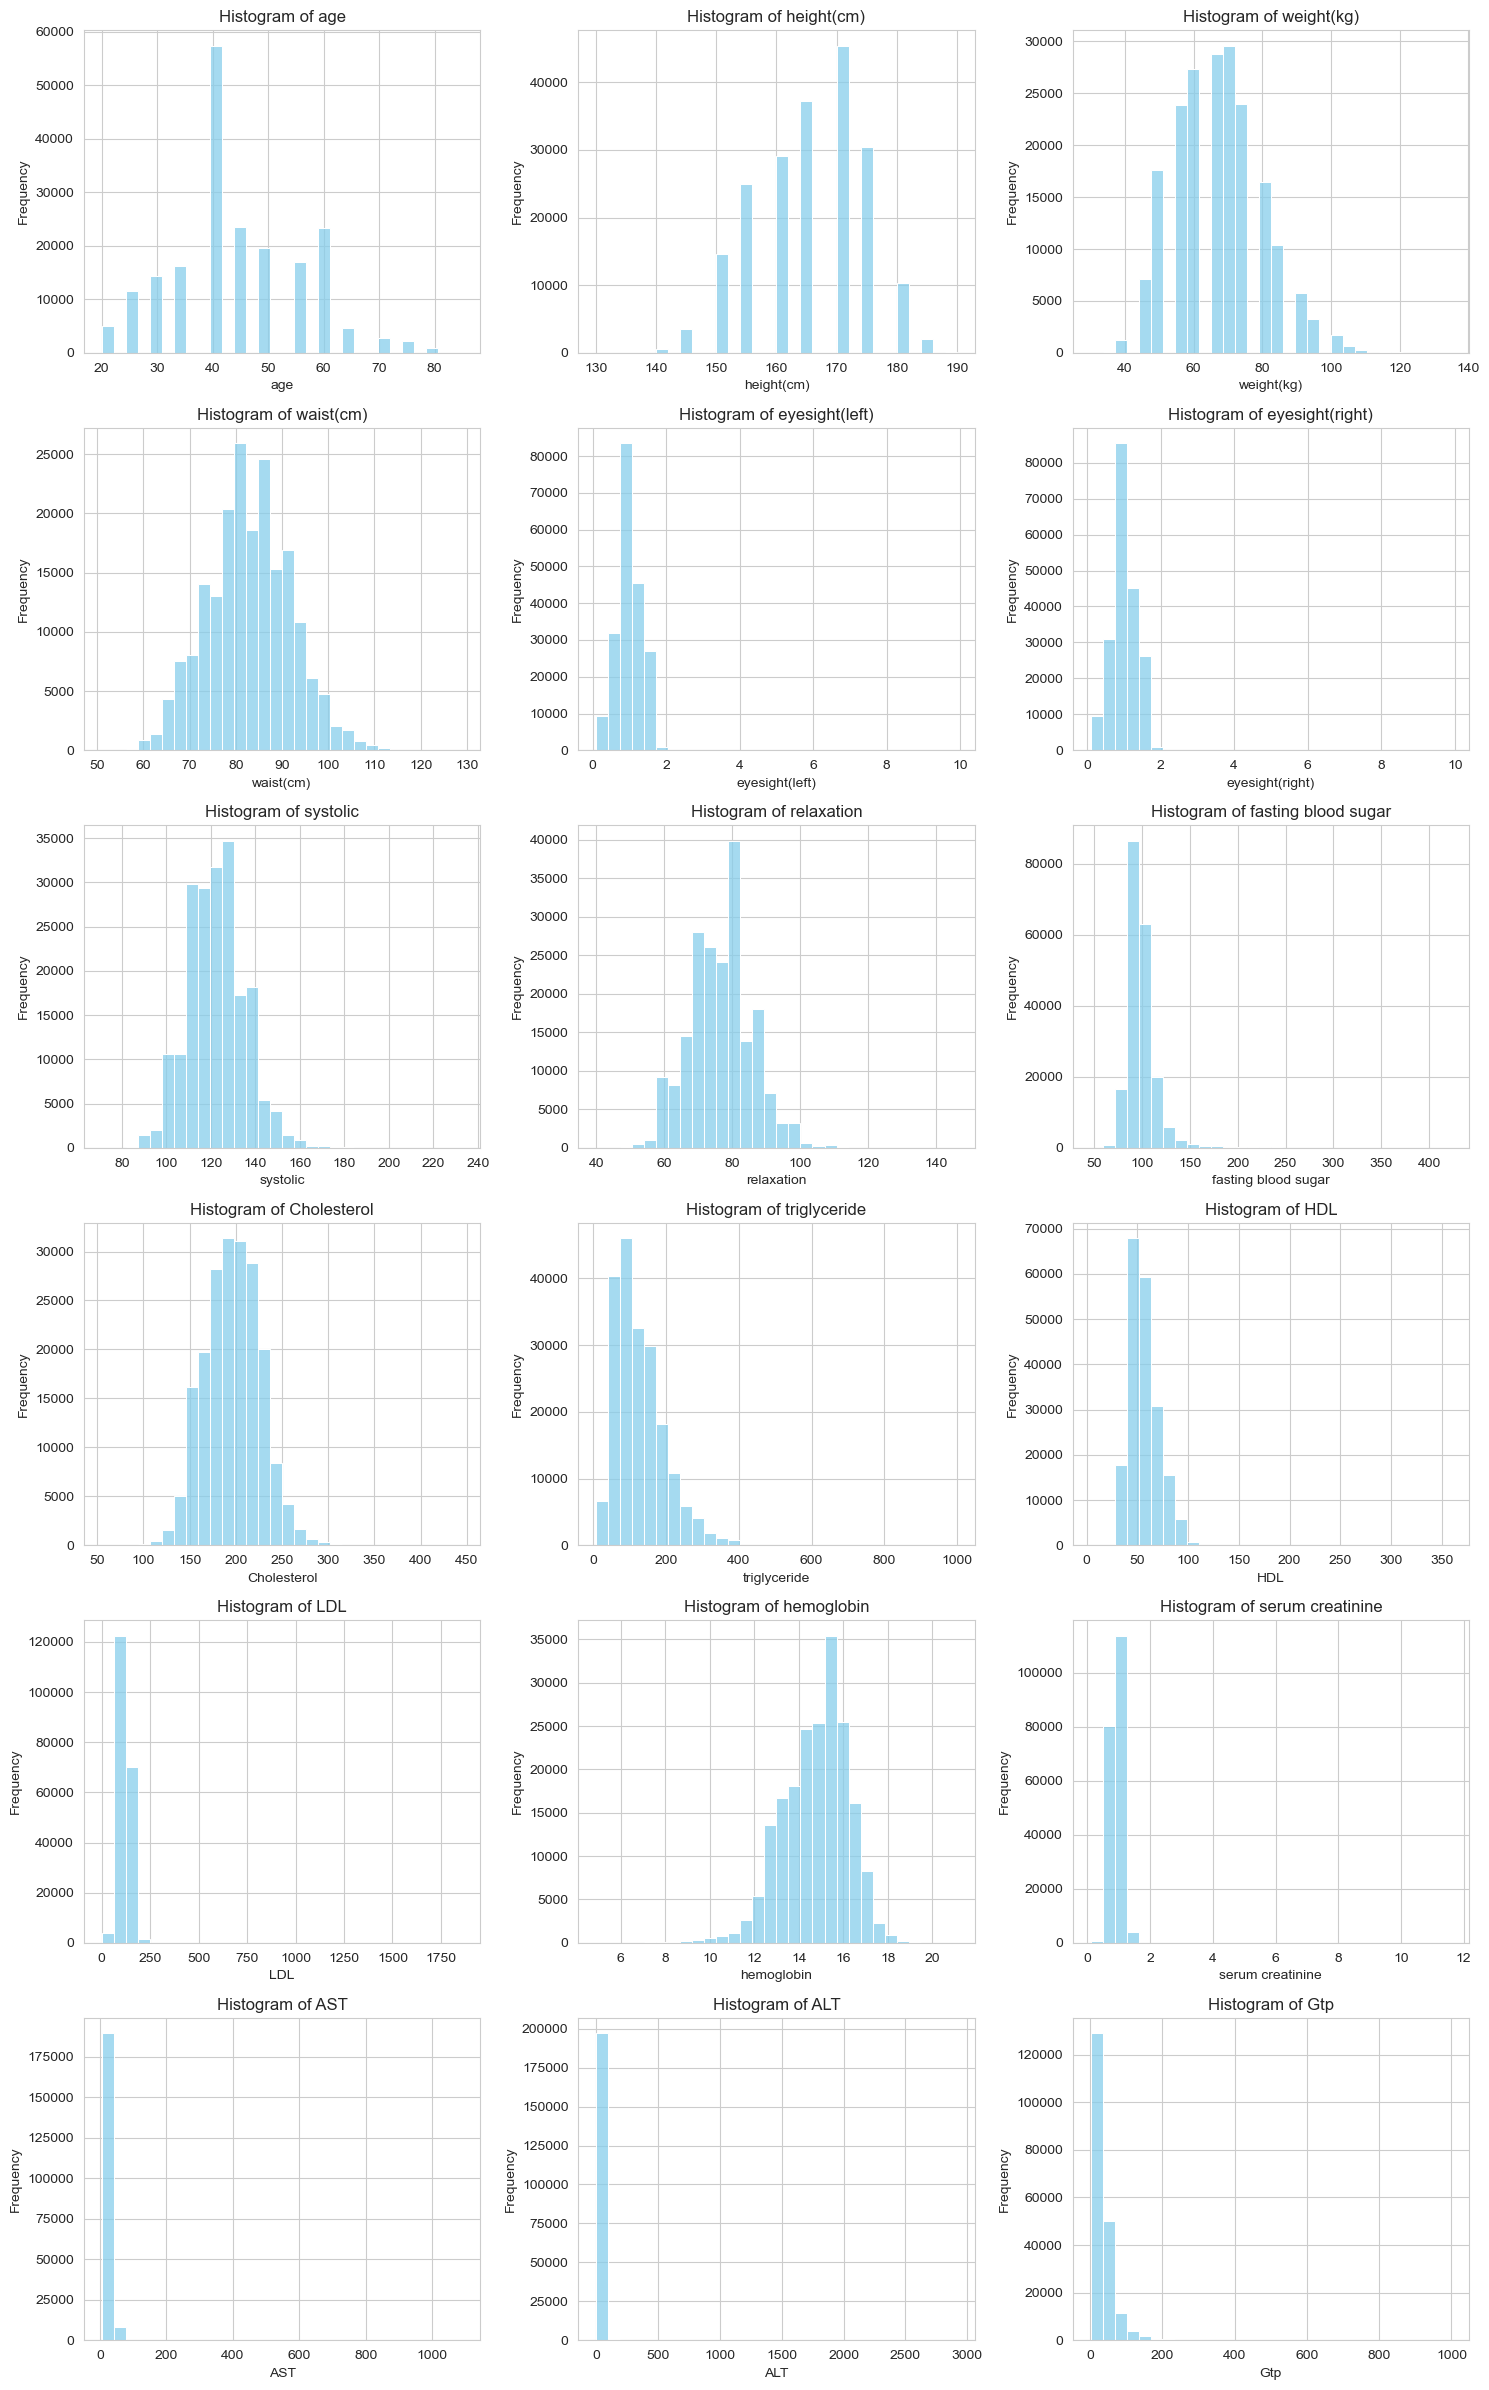

In [25]:
# Setting up the grid size for histograms
n_cols = 3
n_rows = (len(continuous_features) + n_cols - 1) // n_cols  # Calculate rows based on number of features

# Grid of Histograms for each feature
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
for i, feature in enumerate(continuous_features):
    # Determine position in the grid
    row = i // n_cols
    col = i % n_cols

    sns.histplot(train[feature], ax=axes[row, col], kde=False, color='skyblue', bins=30)
    axes[row, col].set_title(f'Histogram of {feature}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Observations from the histograms:
- **Height, Weight, and Age Distributions:** These features show atypical distributions, indicating potential cutoffs or rounding in the data.

### Bar Charts for Categorical Featurs

Below, bar plots are created for each categorical feature, showing their distribution in the dataset:

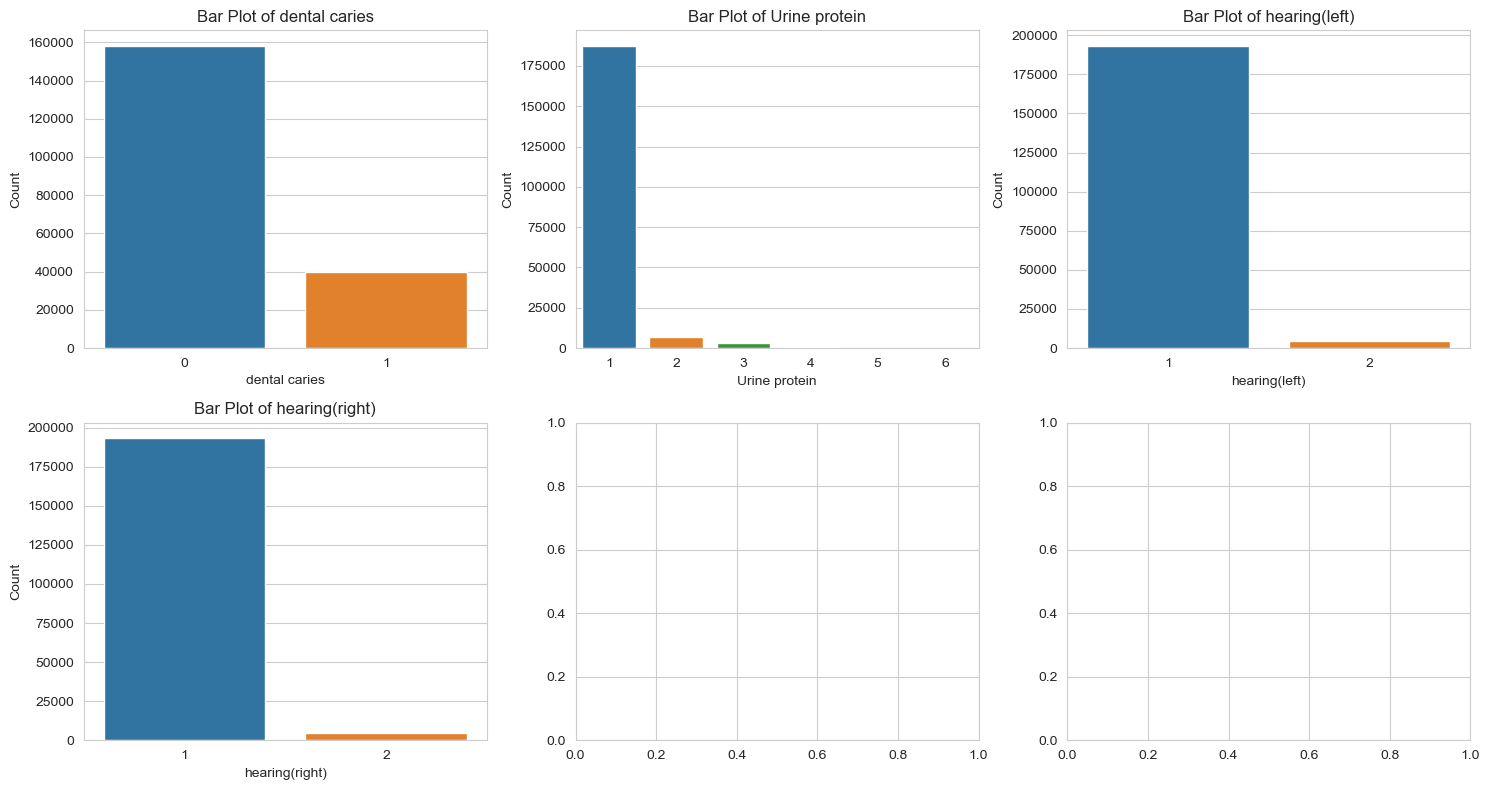

In [26]:
# Setting up the grid size for bar plots
n_cols = 3  
n_rows_cat = (len(categorical_features) + n_cols - 1) // n_cols 

# Grid of Bar Charts for each feature
fig, axes = plt.subplots(n_rows_cat, n_cols, figsize=(15, 4 * n_rows_cat))
for i, feature in enumerate(categorical_features):
    # Determine position in the grid
    row = i // n_cols
    col = i % n_cols

    sns.countplot(x=feature, data=train, ax=axes[row, col])
    axes[row, col].set_title(f'Bar Plot of {feature}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Count')

plt.tight_layout()
plt.show()

### Observations from the categorical data bar charts:
- **Dominant Categories:** Most categorical features are characterized by a dominant category. For instance:
  - Both `hearing(left)` and `hearing(right)` are predominantly marked as '1' over '2'.
  - `Urine protein` also shows a clear dominance of the '1' category.

### Comparative Analysis by Smoking Status

Next, we'll examine how different features vary with smoking status:

- **KDE and Box Plots for Numeric Variables**: These plots will showcase the distribution differences and outliers for numeric features between smokers and non-smokers.
- **Bar Plots for Categorical Variables**: Analyzing the relationship between smoking status and categorical features.

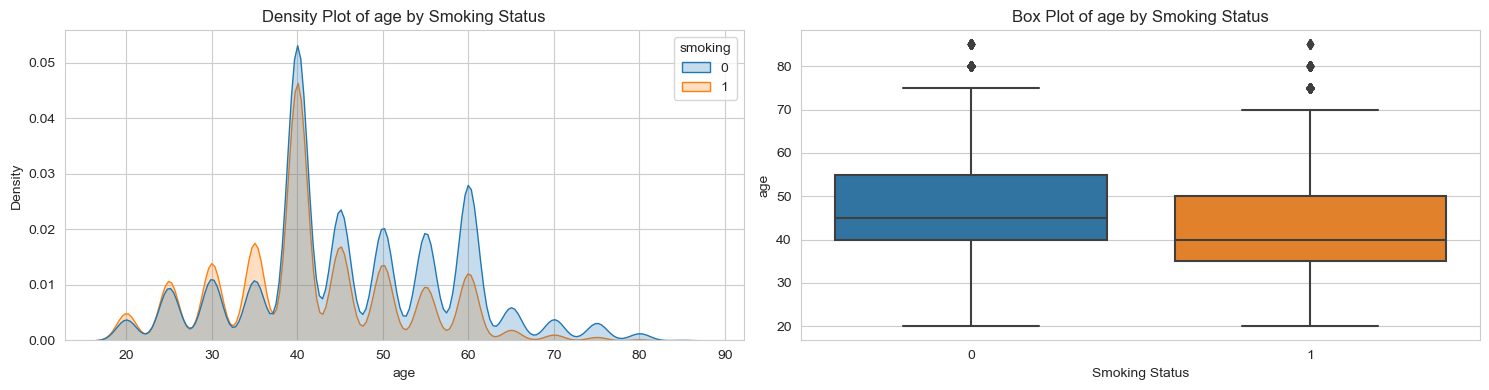

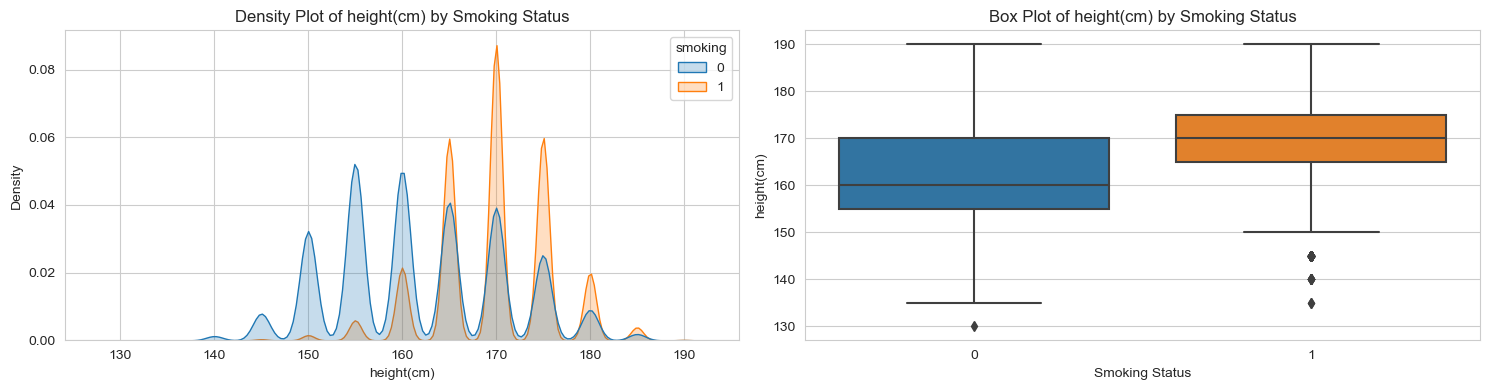

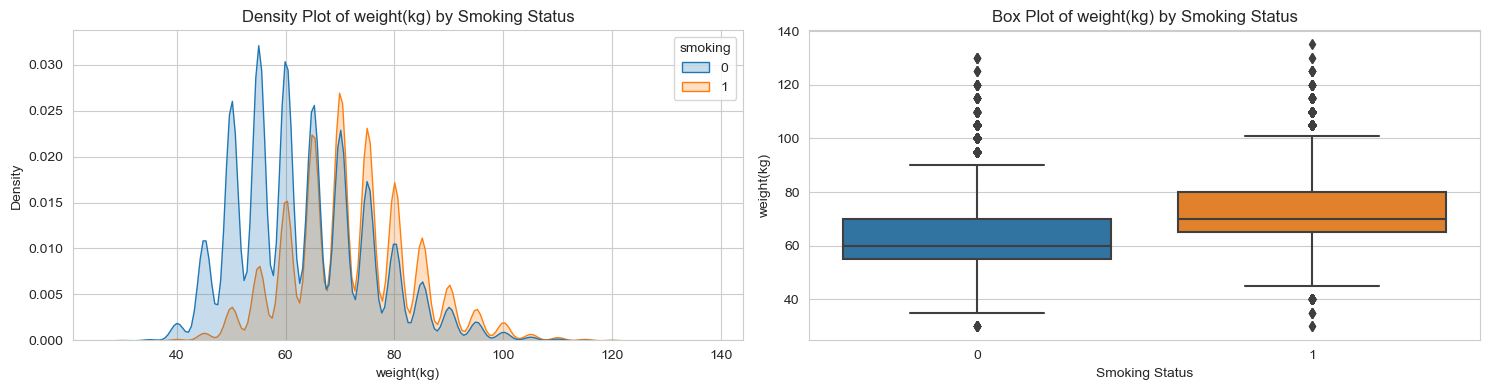

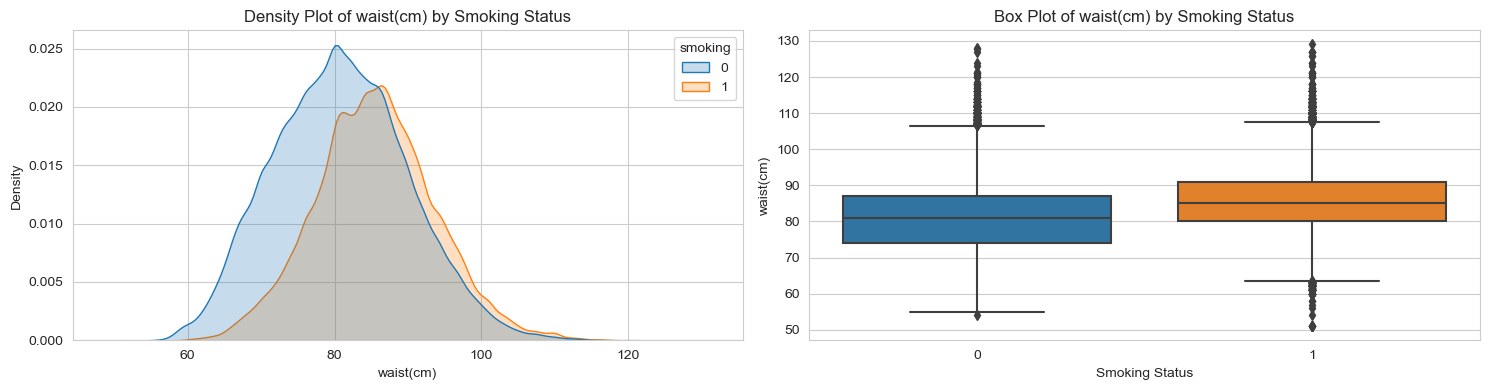

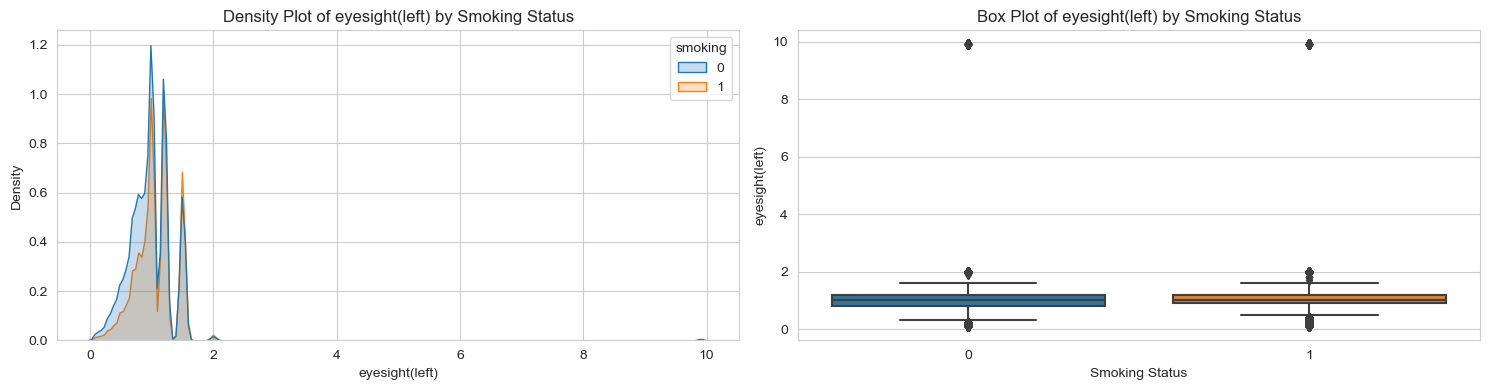

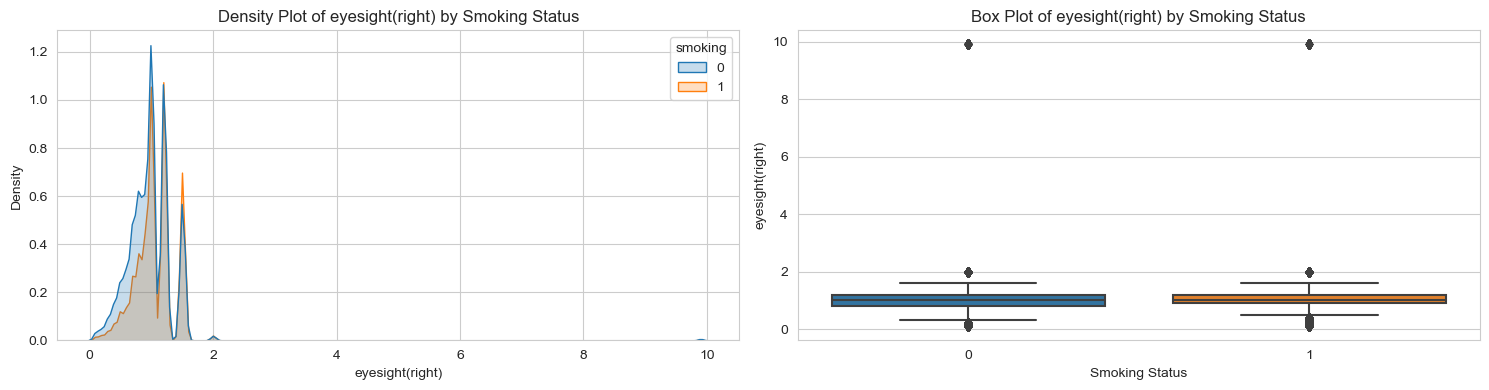

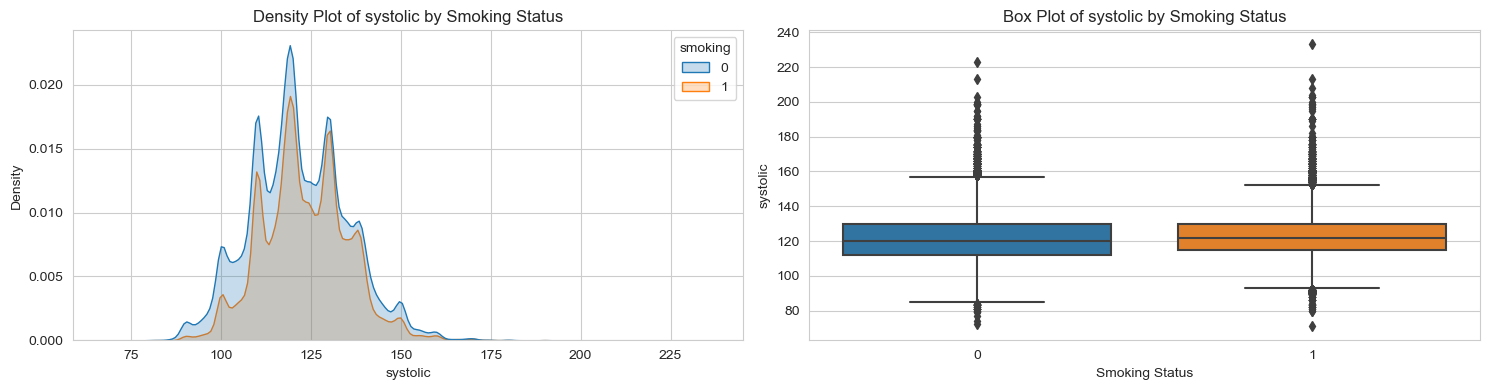

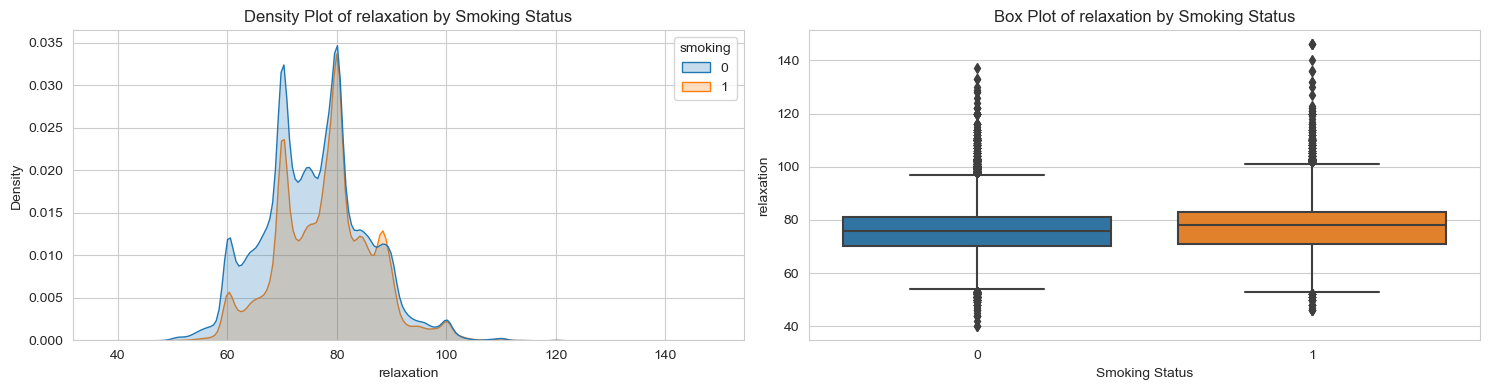

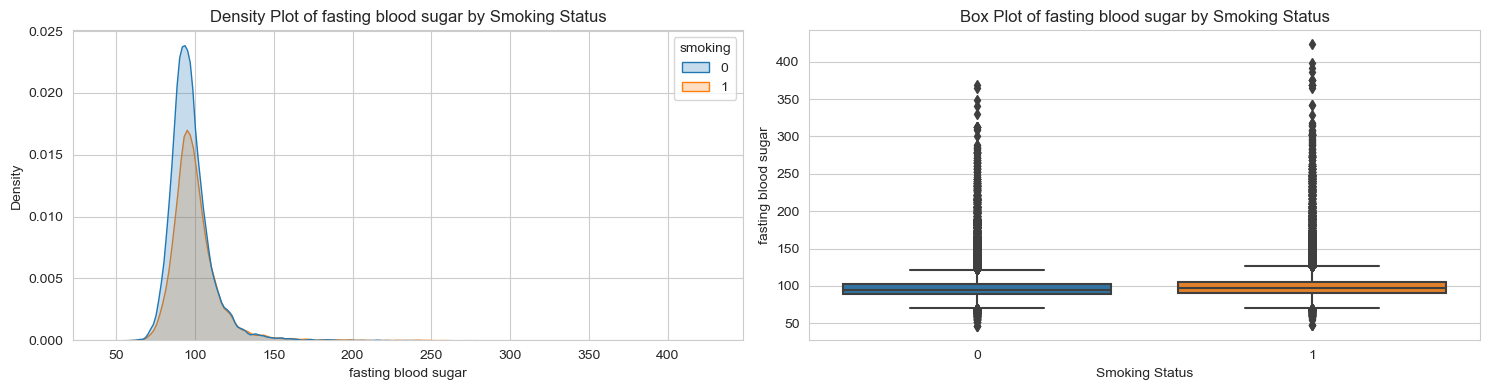

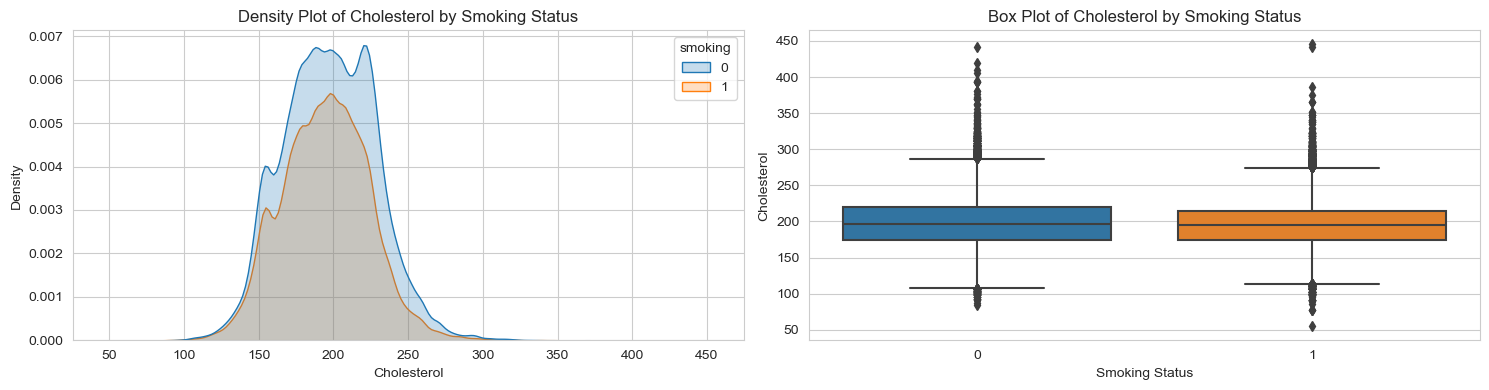

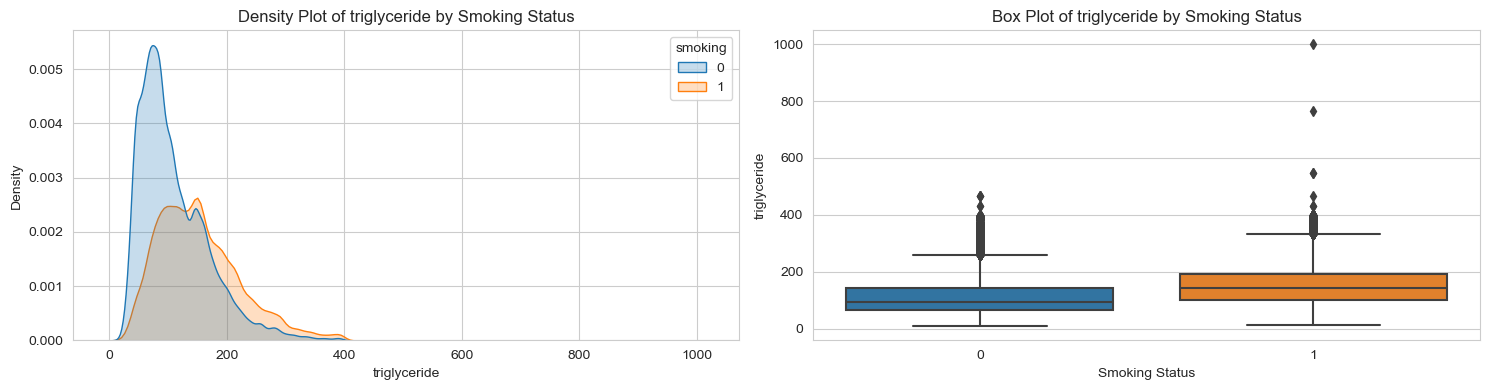

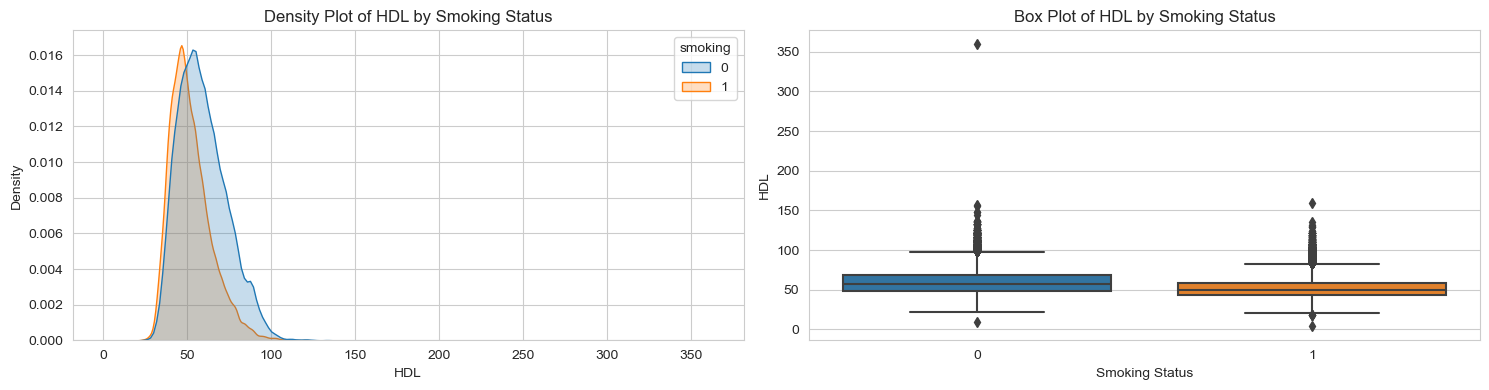

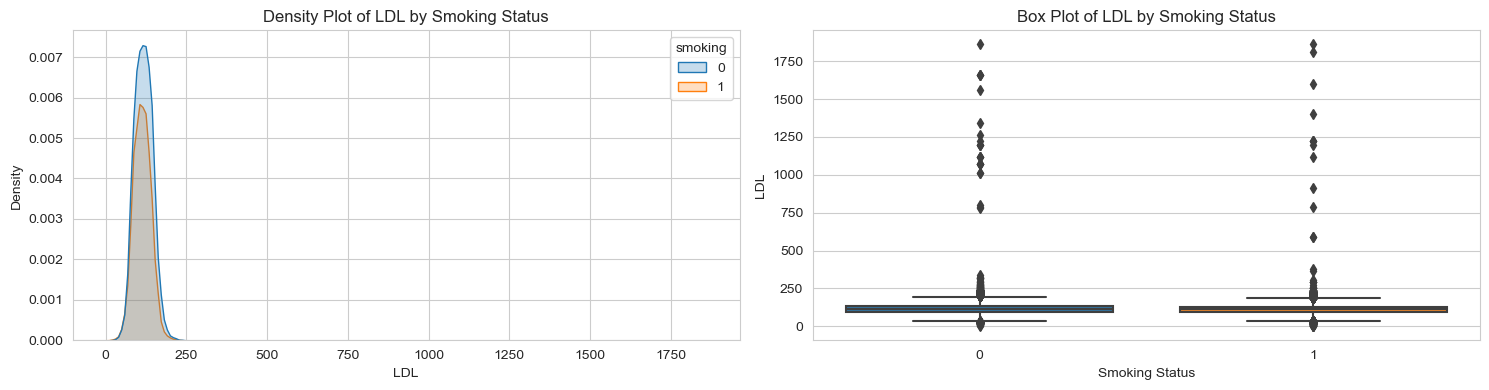

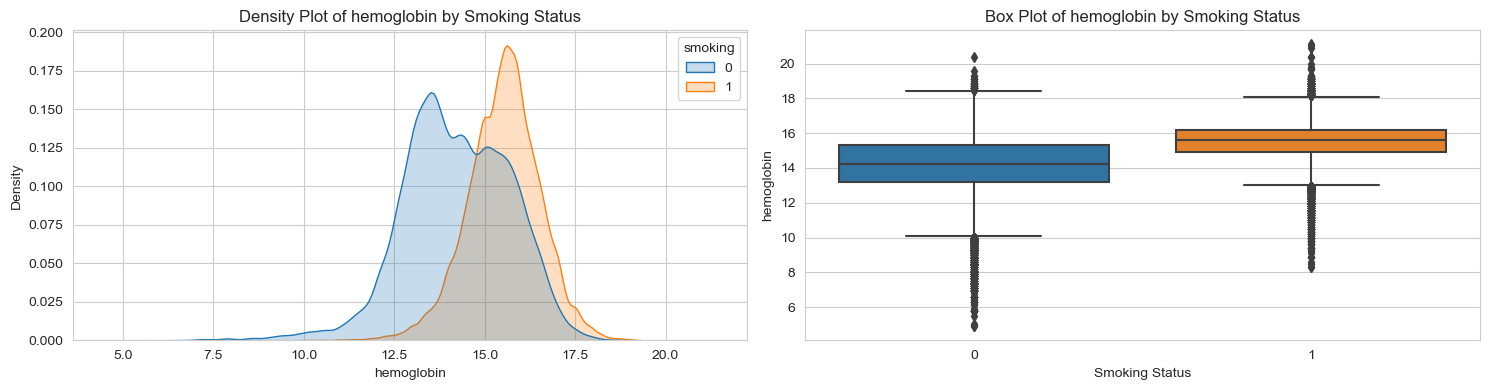

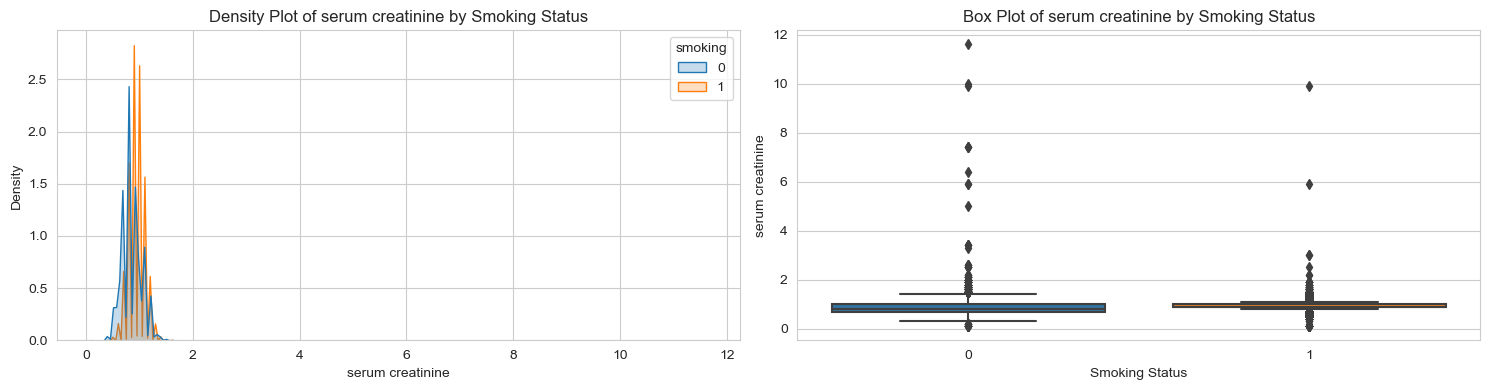

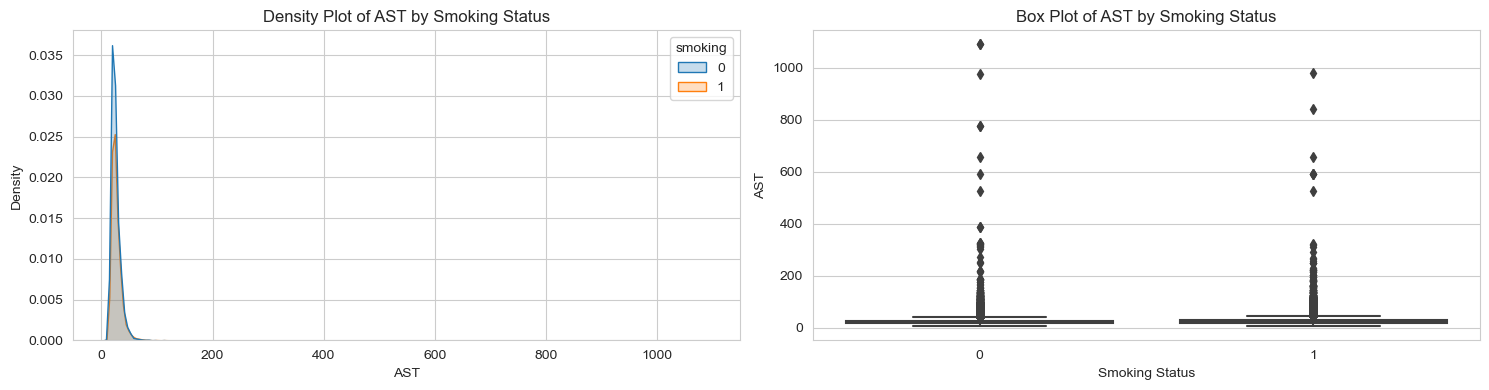

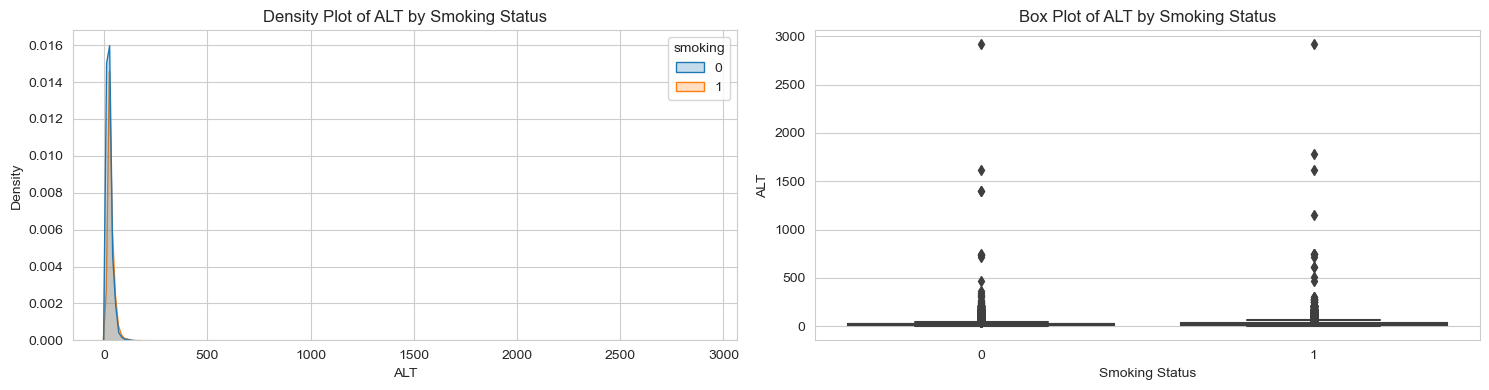

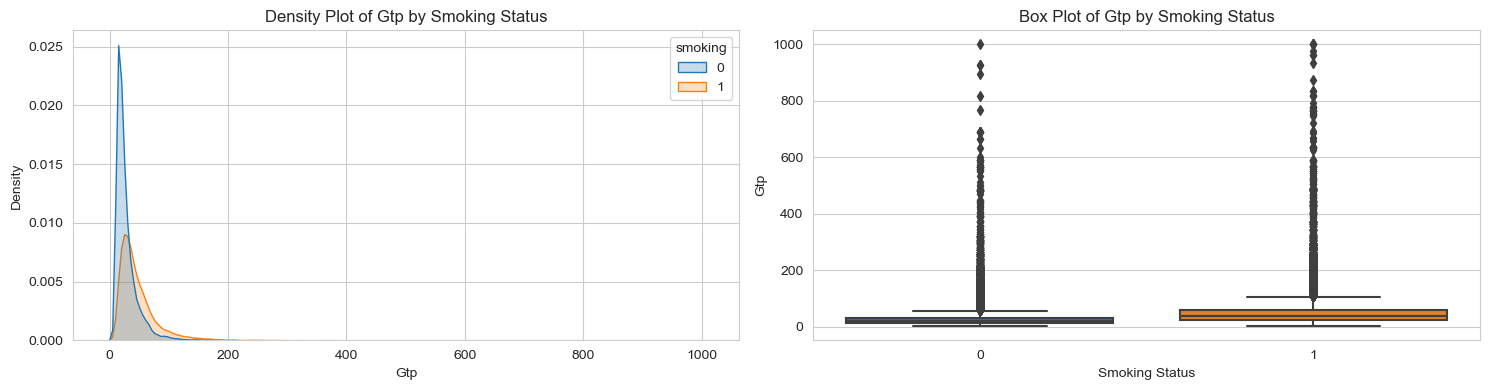

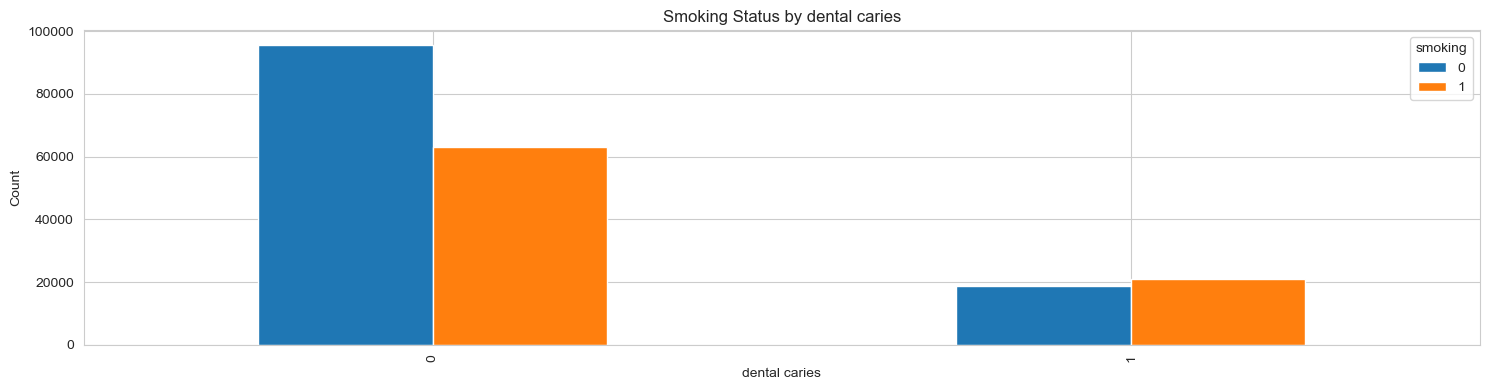

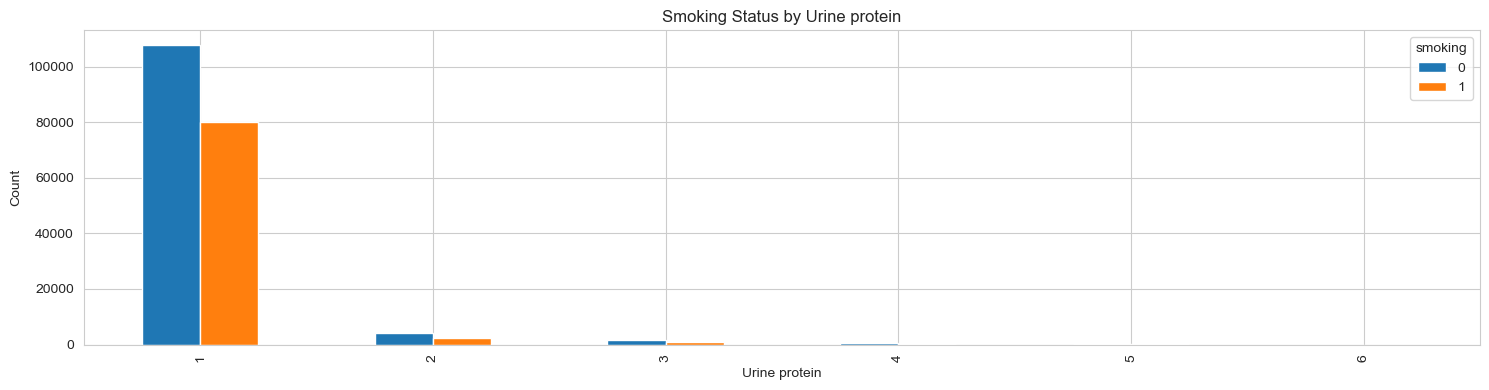

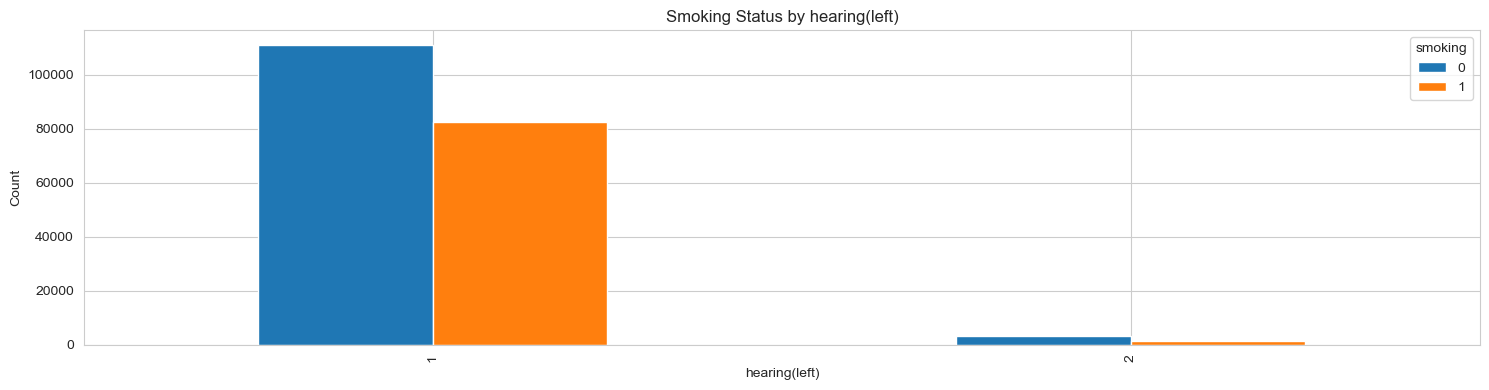

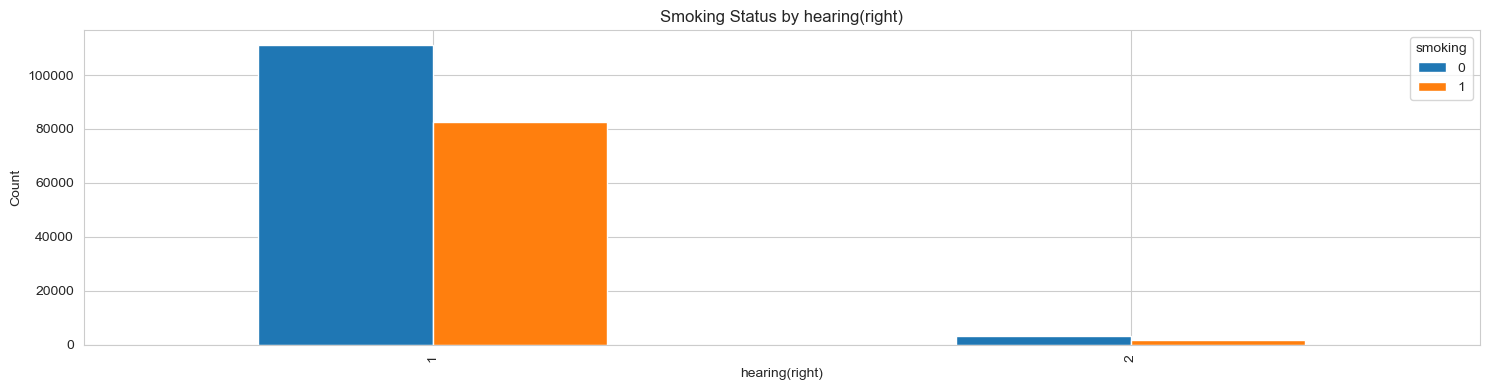

In [125]:
# KDE Plots and Boxplots for Numeric Variables
for col in continuous_features:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
    # KDE Plot
    sns.kdeplot(data=train, x=col, hue='smoking', ax=axes[0], fill=True)
    axes[0].set_title(f'Density Plot of {col} by Smoking Status')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Density')

    # Box Plot
    sns.boxplot(x='smoking', y=col, data=train, ax=axes[1])
    axes[1].set_title(f'Box Plot of {col} by Smoking Status')
    axes[1].set_xlabel('Smoking Status')
    axes[1].set_ylabel(col)

    plt.tight_layout()
    plt.show()

# Categorical Variables Comparison with Smoking
for col in categorical_features:
    fig, ax = plt.subplots(figsize=(15, 4))
    pd.crosstab(train[col], train['smoking']).plot(kind='bar', ax=ax)
    plt.title(f'Smoking Status by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

### Comparative Analysis Findings

The comparative analysis by smoking status reveals several interesting patterns:

- **Height and Smoking:** Taller individuals appear more likely to be smokers. This observation is odd as height is a genetic trait and does not seem like it would be directly influenced by smoking habits. Still correlation does not mean causation. 
- **Age Factor:** People over 50 years are less likely to be smokers, whereas the age group of 35-40 years shows a higher likelihood of smoking.
- **Weight:** Smokers tend to be heavier on average compared to non-smokers.
- **Eyesight Variation:** The data shows fluctuation in eyesight values between 0 and 2, with outliers of 10. The relationship between eyesight and smoking is not clear.
- **Hemoglobin Levels:** High hemoglobin levels (above approximately 15-16) are associated with a higher probability of being a smoker.

### Correlation Matrix for Numeric Features

We will now create a correlation matrix to observe the relationships between numeric features, and how they relate to the target variable 'smoking'

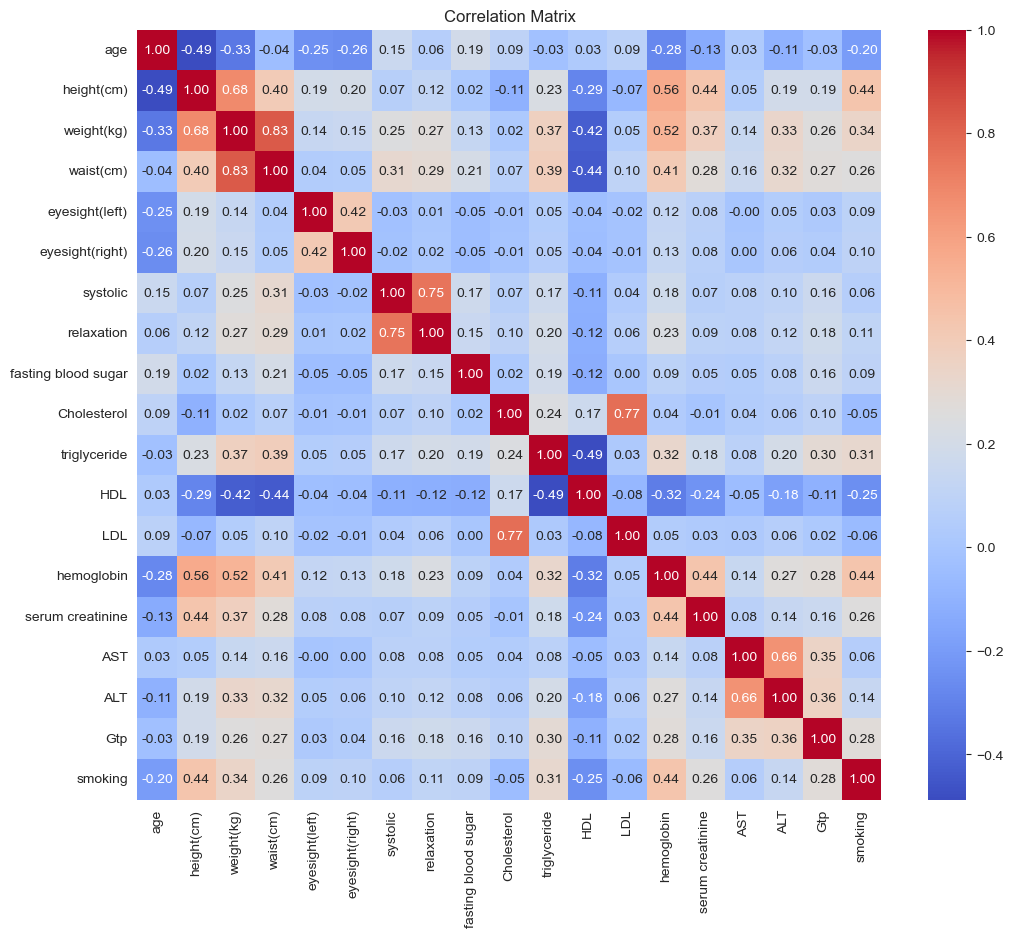

In [126]:
correlation_matrix = train[continuous_features + ['smoking']].corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### Correlation Matrix Findings

Analysis of the correlation matrix shows:

- **Feature-Feature Correlations:** Some features naturally correlate with each other, as they share related physical or biological characteristics:
    - Waist size and weight have a correlation of .83, understandable given their direct relation to body size.
    - Cholesterol levels correlate with LDL at .76, aligning with their common roles in lipid metabolism.
- **Correlation with Smoking Status:** Hemoglobin and height show moderate correlations with smoking status (.44 and .44), indicating possible links, but none of these are overwhelmingly strong.

### Pair Plot for Key Features
Next, a pair plot is displayed to visually inspect the pairwise relationships and distributions of a some of the features. This includes 'systolic', 'Cholesterol', 'age', 'hemoglobin', 'height(cm)', 'weight(kg)', and 'HDL', chosen based on their correlations and potential relevance in predicting smoking status.

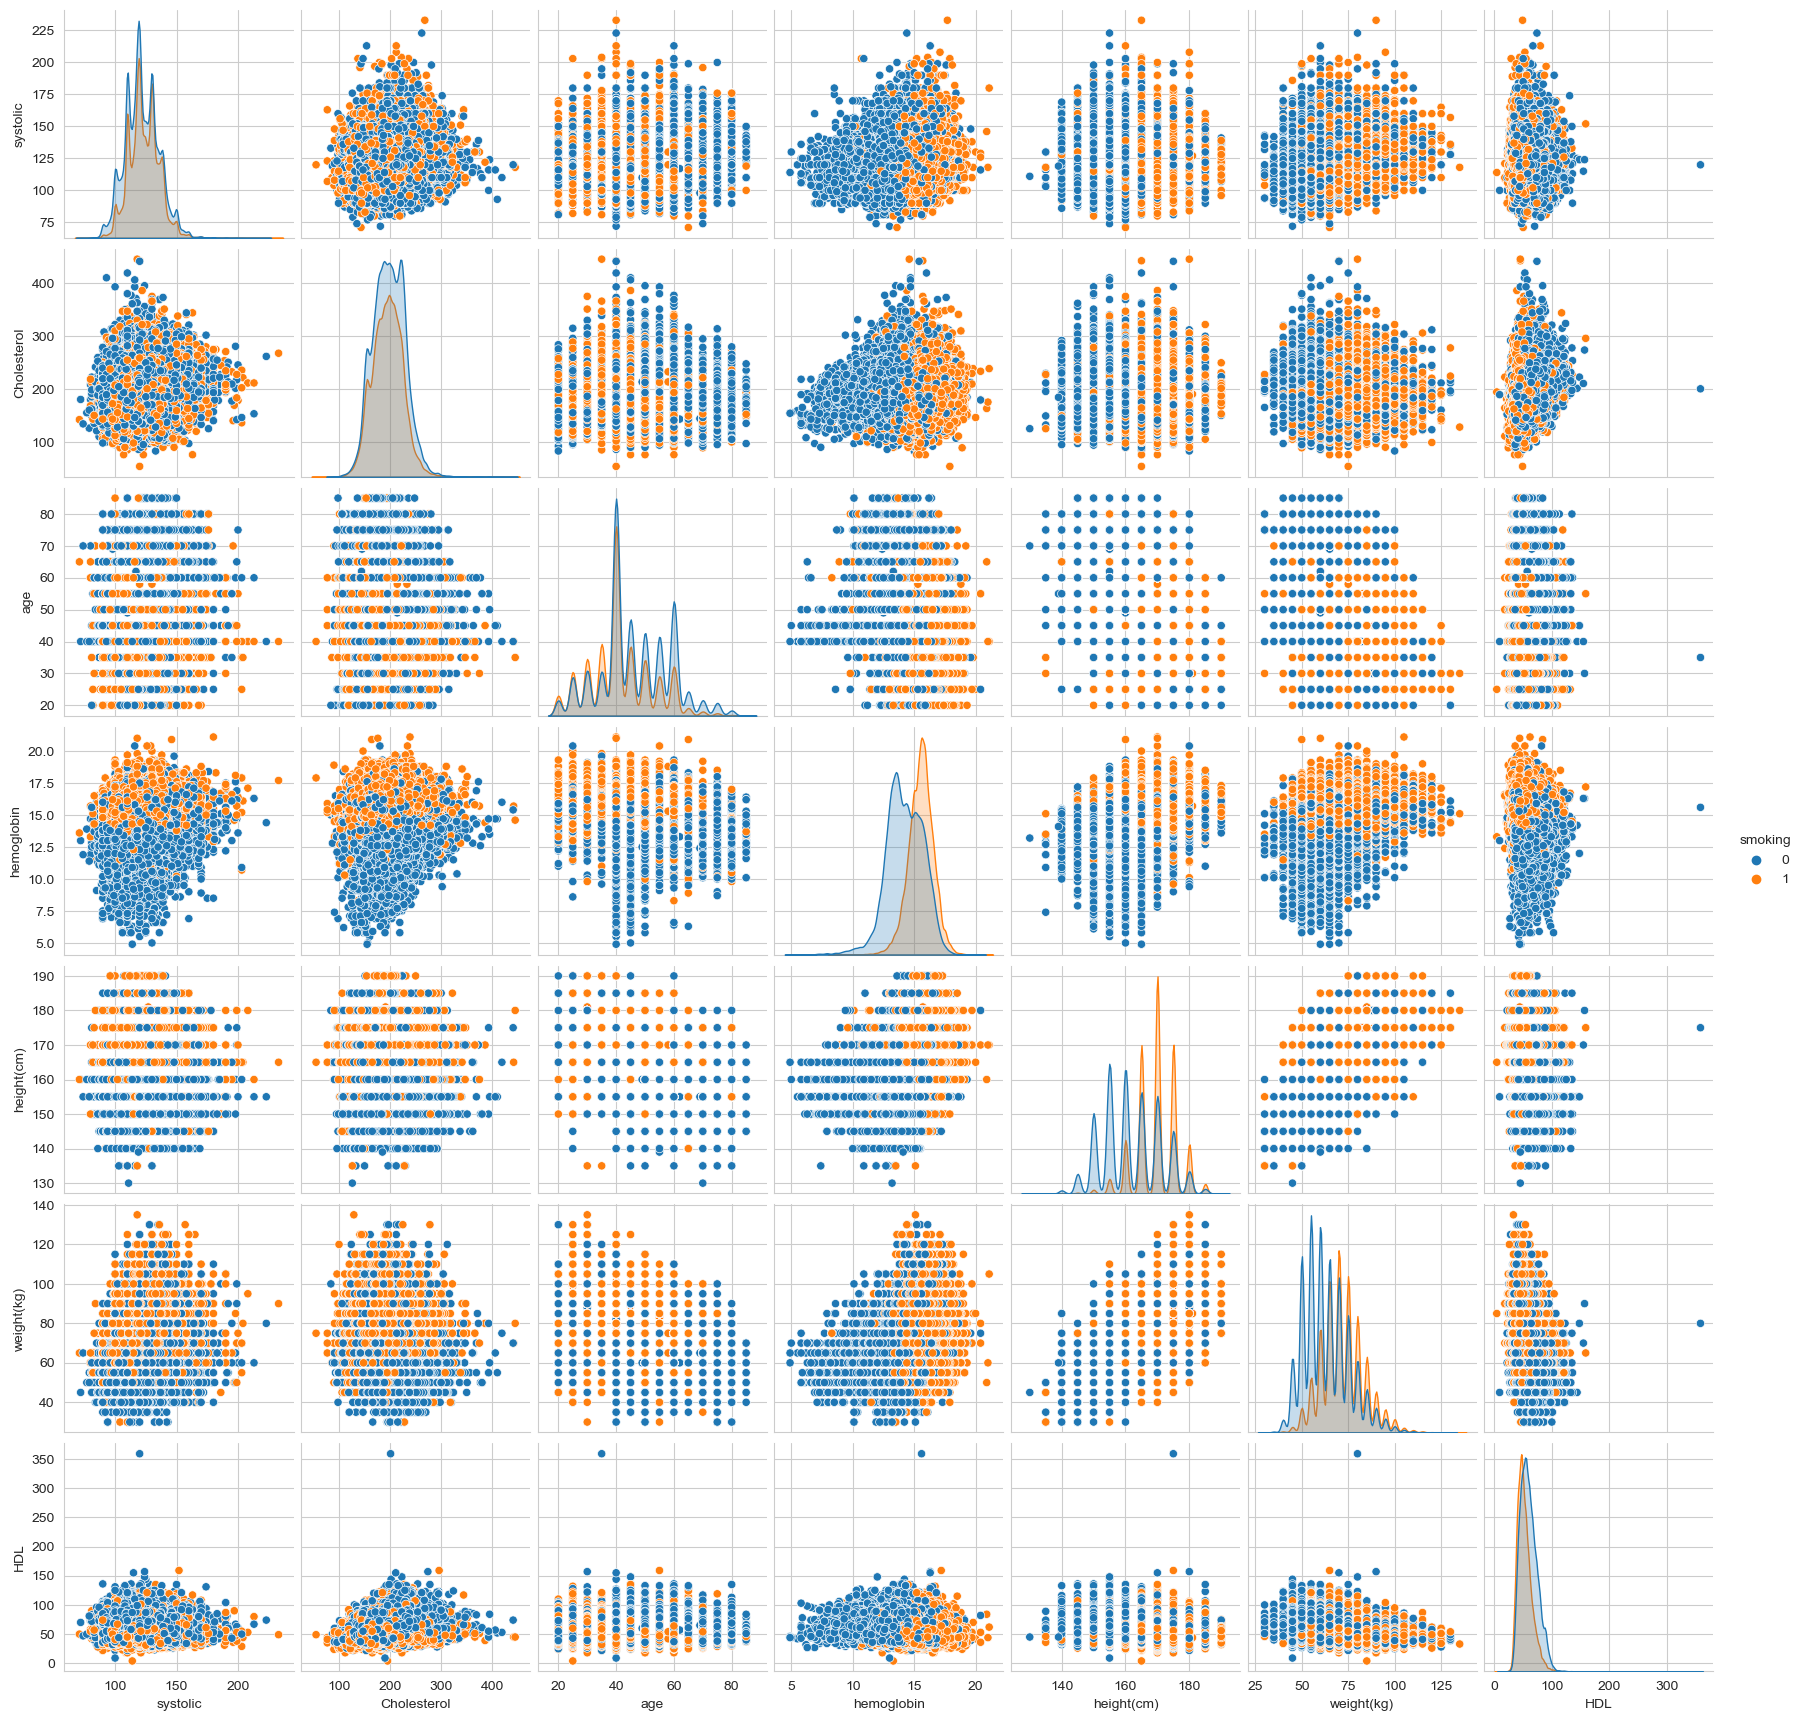

In [127]:
features_for_pairplot = ['systolic', 'Cholesterol','age', 'hemoglobin', 'height(cm)', 'weight(kg)', 'HDL', 'smoking']

sns.pairplot(train[features_for_pairplot], hue='smoking')
plt.show()

### Pair Plot Analysis Highlights
- Smokers consistently show higher hemoglobin levels across comparisons with systolic blood pressure, cholesterol, age, weight, and HDL.
- Again there is a trend between smoking and increased hemoglobin, alongside other health variables.

# Data Preprocessing 

## Dimensionality Reduction and Scaling Considerations

### Standard Scaling
- **Reason for Implementation**: Standard scaling was applied to continuous features to normalize them, even though models sensitive to feature scale, like Logistic Regression or KNN, were not used in the final model set. This decision was upheld to maintain a consistent preprocessing approach across different model types.

### Dropping Categorical Features
- **Reason for Implementation**: Categorical features were dropped from the dataset and excluded from model training. This decision was informed by feature importance analyses from various models, which consistently indicated that categorical features contributed little to no predictive power.

## Considerations Not Implemented

### One-Hot Encoding
- **Consideration**: Initially, one-hot encoding was considered for categorical features such as 'Urine protein', 'hearing(left)', and 'hearing(right)' to ensure their appropriate representation in the models.
- **Decision Against It**: The decision to drop categorical features from the dataset negated the need for one-hot encoding, as these features were no longer part of the modeling process.

### Feature Engineering
- **Consideration**: Efforts were made to engineer new features and explore various combinations or selective feature inclusion based on feature importance data. This was aimed at enhancing model performance by introducing potentially more informative variables.
- **Decision Against It**: Despite extensive experimentation with feature engineering, including trying different combinations and dropping certain features, no significant improvement in model performance was observed.

### Outlier Handling
- **Consideration**: Experimentation was conducted with handling outliers present in the data. 
- **Decision Against It**: Ultimately, no improvement in model performance was seen, leading to the decision to abandon this effort. 

In [128]:
processed_train = train.drop(categorical_features, axis=1)
processed_test = test.drop(categorical_features, axis=1)

scaler = StandardScaler()

processed_train[continuous_features] = scaler.fit_transform(processed_train[continuous_features])
processed_test[continuous_features] = scaler.transform(processed_test[continuous_features])

processed_train.head()

age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0 -0.780010    0.544836    1.429527   1.569012       -0.254476   
1 -2.041970    1.106914    3.404744   3.007171       -0.727483   
2  0.061296   -1.141397   -0.150647   0.352109       -0.254476   
3  0.061296   -0.017242    1.034484   1.237130       -0.490979   
4 -2.041970   -0.017242   -0.545690  -0.201028        1.164548   

   eyesight(right)  systolic  relaxation  fasting blood sugar  Cholesterol  \
0        -0.247486 -0.332917    0.142180            -0.093685     1.426766   
1        -0.247486 -0.255521    0.251641            -0.638653     0.497493   
2        -0.247486 -0.952083    0.361102            -1.123068    -0.099896   
3        -0.730298  2.762914    1.236787             9.110216     0.464305   
4        -2.178732 -1.029479   -1.390270             0.087971    -0.564533   

   triglyceride       HDL       LDL  hemoglobin  serum creatinine        AST  \
0      0.379536  0.982804  0.863857    3.449004          0.576841   2.942216   
1      0.008234  1.053692 -0.022178    0.778540          1.108198  -0.553570   
2     -0.110583  0.061251 -0.085466   -0.727875         -1.548589  88.588975   
3      3.543034 -0.718524 -0.749993    1.463275          0.045483   0.528459   
4      1.077585 -0.647635 -0.718348    0.093806          1.639555   0.029061   

         ALT       Gtp  smoking  
0   4.182576  2.470980        1  
1  -0.078946 -0.194782        0  
2  65.027641  6.708139        0  
3   0.441906 -0.026418        0  
4   0.063105 -0.615692        0

# Machine Learning Approaches 

### Baseline Model Explanation:
The initial phase of model evaluation involved testing a variety of machine learning algorithms to establish a comprehensive baseline. The baseline models included Logistic Regression, KNN, Random Forest, SVM with RBF Kernel, XGBoost, LightGBM, CatBoost, and Gradient Boosting. Logistic Regression was the first model tested, providing a basic yet essential benchmark for binary classification. However, it was quickly observed that tree-based models, particularly the Gradient Boosting variants, outperformed Logistic Regression, KNN, and SVM. This varied approach in the baseline evaluation was crucial for gaining a well-rounded understanding of the dataset and identifying the more effective models for this specific classification task. The use of Logistic Regression as a baseline model resulted in an AUC-ROC of 0.827, setting a benchmark for comparison.

### Selection of Machine Learning Tools and Approaches:

- **Feature Importance Analysis:** The utilization of feature importance data played a significant role in refining the model selection and feature set. This approach informed decisions on which features to retain or drop, thus optimizing the models' performance.
- **Stratified K-Fold Cross-Validation:** Employing stratified K-Fold Cross-Validation ensured that the validation results were reliable and closely mirrored the actual Kaggle test results. This method was pivotal in validating the models' effectiveness and robustness across different subsets of the data.

### Improvement Model(s):

- **Optuna-Optimized Ensemble Model:** Building upon the baseline models, the next step was to focus on the high-performing tree-based models. An ensemble model combining optimized versions of Random Forest, CatBoost, and XGBoost was developed using Optuna for hyperparameter tuning. This ensemble approach significantly improved the prediction accuracy, achieving an AUC-ROC of 0.871. This model not only surpassed the baseline Logistic Regression model but also demonstrated the effectiveness of ensemble techniques in enhancing model performance.

### Rationale for Model Selection:
The choice of tree-based models for the ensemble was informed by their superior performance in the baseline evaluation. The integration of these models into an ensemble framework leveraged their individual strengths and mitigated their weaknesses, leading to a more robust and accurate predictive model.

### Dataset Splitting
The data is split into training (80%) and testing (20%) sets. Stratified K-Fold cross-validation is used to maintain the proportion of the target class in each fold (5), ensuring more reliable and stable evaluation metrics across different folds of the data.

In [129]:
X = processed_train.drop('smoking', axis=1)
y = processed_train['smoking']


# Train-test split (80% train, 20% test) with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Setting up Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5)

## Base Model Testing
Here a variety of base models are evaluated to assess which ones are most promising, based on their AUC-ROC scores.

In [130]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Evaluate each model using Stratified K-Fold Cross-Validation
model_scores = {}
for model_name, model in models.items():
    # Cross-validation scores
    cv_scores = cross_val_score(model, X_train, y_train, cv=skf, scoring='roc_auc')
    mean_auc_roc = np.mean(cv_scores)
    
    # Store the scores
    model_scores[model_name] = mean_auc_roc

    # Display the AUC-ROC score for each model
    print(f"AUC-ROC (CV) for {model_name}: {mean_auc_roc:.4f}")

AUC-ROC (CV) for Logistic Regression: 0.8270
AUC-ROC (CV) for Random Forest: 0.8626
AUC-ROC (CV) for XGBoost: 0.8619
AUC-ROC (CV) for LightGBM: 0.8605
AUC-ROC (CV) for CatBoost: 0.8656
AUC-ROC (CV) for Gradient Boosting: 0.8538


### Baseline Model Performance Summary
RandomForestClassifier, XGBoost and CatBoost appear to perform the best in the baseline models. Still, the differences between the models is pretty thin besides Logistic Regression which performed noticeably worse than the others.

## Hyperparameter Tuning with Optuna

After evaluating the performance of several base models, the top three performers are now selected for further optimization. Using Optuna,this section tries to refine these models by searching for the best hyperparameter combinations to enhance their predictive accuracy.


- **Simplified Tuning:**
Originally I was quite lost trying to learn how to use Optuna and determine what the best hyperparameters choices were to include in the optimization study. I read basically every discussion/post on the Kaggle competition as well as documentation for models trying to understand the influence of each hyperparameter and its impact on the models performance. After reading all the posts, I initally tried to follow along similar to what others were doing with crazy long detailed lists of several hyperparameters to be included in my optimization studies. However, I don't feel I fully understood the purpose of each hyperparameter, and so I have since simplified my parameter lists to focus in on the hyperparameters I understand and feel have the biggest impact in refining the models performance.

### CatBoost Hyperparameter Tuning

Exploring hyperparameters for CatBoostClassifier to optimize performance:

- **`iterations`**: Determines the number of boosting iterations. Balances model complexity and overfitting.
- **`depth`**: Depth of the tree. Deeper trees risk overfitting.
- **`learning_rate`**: Influences the size of the steps during learning. Lower values can prevent overfitting.

In [131]:
# def objective_catboost(trial):
#    param = {
#        'iterations': trial.suggest_int('iterations', 100, 1000),
#        'depth': trial.suggest_int('depth', 5, 10),
#        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
#    }
#    model = CatBoostClassifier(**param, verbose=0, eval_metric='AUC')
#    score = cross_val_score(model, X_train, y_train, cv=skf, scoring='roc_auc')
#    return score.mean()

# study_catboost = optuna.create_study(direction='maximize')
# study_catboost.optimize(objective_catboost, n_trials=50, show_progress_bar=True)

# print('Best parameters for CatBoostClassifier:', study_catboost.best_params)

### XGBoost Hyperparameter Tuning

Optimizing hyperparameters for XGBClassifier to maximize model efficacy:

- **`n_estimators`**: Number of boosting rounds. More rounds can improve accuracy but may lead overfitting.
- **`max_depth`**: Sets the maximum depth of the trees. 
- **`learning_rate`** Controls the learning rate. 

Trying to balance complexity and overfitting

In [132]:
# def objective_xgboost(trial):
#    params = {
#        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
#        'max_depth': trial.suggest_int('max_depth', 5, 10),
#        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
#    }
#    model = XGBClassifier(**params, eval_metric='auc')
#    score = cross_val_score(model, X_train, y_train, cv=skf, scoring='roc_auc')
#    return score.mean()

# study_xgboost = optuna.create_study(direction='maximize')
# study_xgboost.optimize(objective_xgboost, n_trials=30, show_progress_bar=True)

# print('Best parameters for XGBClassifier:', study_xgboost.best_params)

### RandomForest Hyperparameter Tuning

Fine-tuning RandomForestClassifier to enhance performance:

- **`n_estimators`**: Number of trees in the forest. 
- **`max_depth`**: Maximum depth of each tree. 

In [133]:
# def objective_rf(trial):
#    params = {
#        'n_estimators': trial.suggest_int('n_estimators', 100, 500), 
#        'max_depth': trial.suggest_int('max_depth', 5, 30) 
#    }
#    model = RandomForestClassifier(**params)
#    score = cross_val_score(model, X_train, y_train, cv=skf, scoring='roc_auc')
#    return score.mean()

# study_rf = optuna.create_study(direction='maximize')
# study_rf.optimize(objective_rf, n_trials=30, show_progress_bar=True)

# print('Best parameters for RandomForestClassifier:', study_rf.best_params)

## Model Evaluation
Evaluating RandomForestRegressor, LightGBM, and XGBoost using optimized hyperparameters. Additionally, the feature importances from each model are extracted to understand the contributing factors in predictions.

In [134]:
# Best parameters from Optuna studies
best_params_catboost = {
    'iterations': 904,
    'depth': 10,
    'learning_rate': 0.06544013750630572
}

best_params_xgboost = {
    'n_estimators': 726,
    'max_depth': 9,
    'learning_rate': 0.04910131334308882
}

best_params_rf = {
    'n_estimators': 490,
    'max_depth': 30
}

cat_model = CatBoostClassifier(**best_params_catboost, eval_metric='AUC', verbose=0)
xgb_model = XGBClassifier(**best_params_xgboost, eval_metric='auc')
rf_model = RandomForestClassifier(**best_params_rf)

rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
cat_model.fit(X_train, y_train)

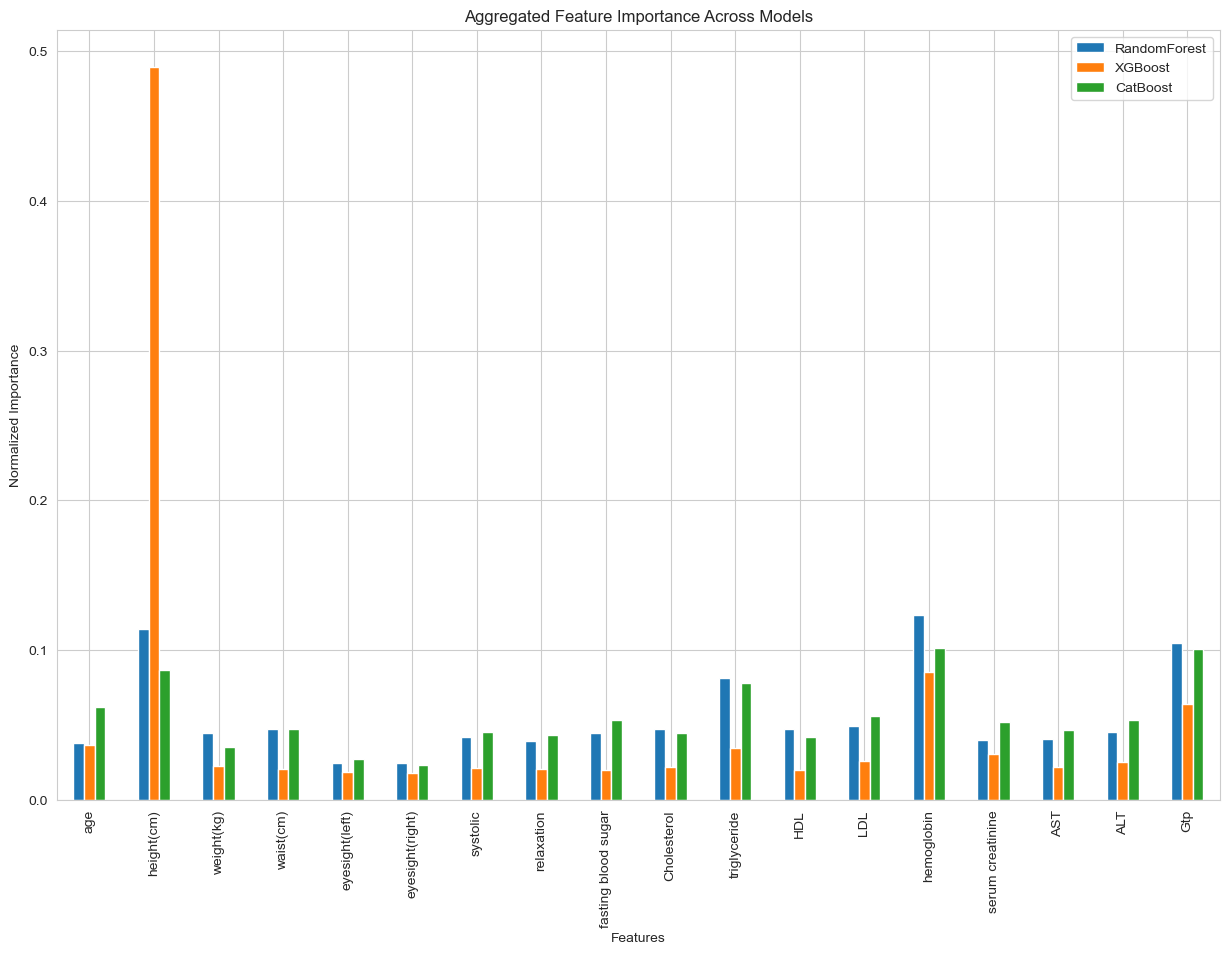

In [135]:
# Extract feature importances
rf_importances = rf_model.feature_importances_
xgb_importances = xgb_model.feature_importances_
cat_importances = cat_model.feature_importances_

# Create a DataFrame to hold all importances
feature_importance_df = pd.DataFrame({
    'RandomForest': rf_importances,
    'XGBoost': xgb_importances,
    'CatBoost': cat_importances
}, index=X_train.columns)

# Normalize importances
feature_importance_df_normalized = feature_importance_df / feature_importance_df.sum()

# plotting the grouped feature importances
plt.figure(figsize=(15, 10))
feature_importance_df_normalized.plot(kind='bar', ax=plt.gca())
plt.title('Aggregated Feature Importance Across Models')
plt.ylabel('Normalized Importance')
plt.xlabel('Features')
plt.show()

### Feature Importance Finding
- **Catgeorical Features Low Score**: Originally when categorial features were included the dataset they consistently scored low on the feature importance data. This ultimately led to my decision to remove categorical features entirely. 

- **Height and XGBoost**: Height is very important for XGBoost model.

## Ensemble Model Prediction and Comprehensive Evaluation

- **Predictions Generation**: Probabilities are derived from RandomForest, XGBoost, and CatBoost models for the test dataset.
- **Ensemble Method**: An ensemble prediction is formed by calculating a weighted average of these model probabilities.
- **Performance Metrics**:
    - **AUC-ROC Score**: 
    - **Precision**: 
    - **Recall**: 
    - **F1 Score**: 
    - **Confusion Matrix**:

Random Forest AUC-ROC: 0.8655742586601608
XGBoost AUC-ROC: 0.8683309267784829
CatBoost AUC-ROC: 0.8658745999154018
AUC-ROC Score for Ensemble Model: 0.871089882486566
Precision: 0.7256169845888566
Recall: 0.8018339883291652
F1 Score: 0.7618239420683414


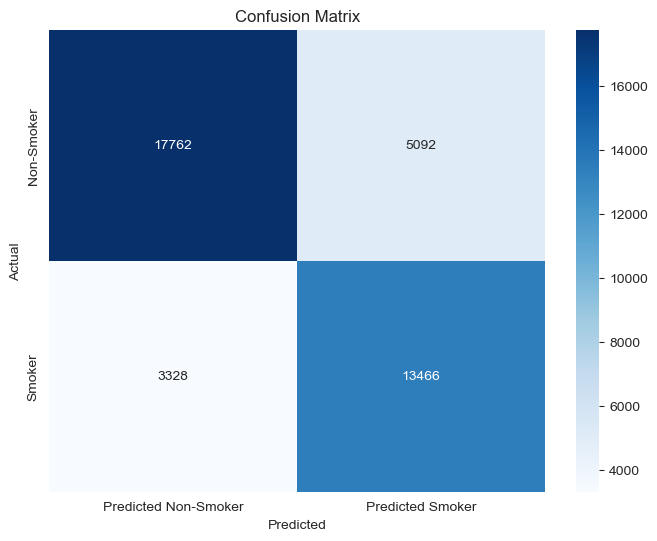

In [136]:
# Predictions
predictions_rf_test = rf_model.predict_proba(X_test)[:, 1]
predictions_xgb_test = xgb_model.predict_proba(X_test)[:, 1]
predictions_cat_test = cat_model.predict_proba(X_test)[:, 1]

auc_rf = roc_auc_score(y_test, predictions_rf_test)
auc_xgb = roc_auc_score(y_test, predictions_xgb_test)
auc_cat = roc_auc_score(y_test, predictions_cat_test)

print("Random Forest AUC-ROC:", auc_rf)
print("XGBoost AUC-ROC:", auc_xgb)
print("CatBoost AUC-ROC:", auc_cat)

# Combine predictions using weighted average
weights = [0.3, 0.4, 0.3] # Weights for RF, XGB, and CatBoost respectively
final_prob_predictions_test = (weights[0] * predictions_rf_test + 
                               weights[1] * predictions_xgb_test + 
                               weights[2] * predictions_cat_test)

threshold = 0.5
final_class_predictions_test = (final_prob_predictions_test > threshold).astype(int)

# metrics
auc_roc = roc_auc_score(y_test, final_prob_predictions_test)
precision = precision_score(y_test, final_class_predictions_test)
recall = recall_score(y_test, final_class_predictions_test)
f1 = f1_score(y_test, final_class_predictions_test)
conf_matrix = confusion_matrix(y_test, final_class_predictions_test)

# Print metrics
print("AUC-ROC Score for Ensemble Model:", auc_roc)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted Non-Smoker", "Predicted Smoker"], yticklabels=["Non-Smoker", "Smoker"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

## Preparing Kaggle Submission

- **Test Set Predictions**: Utilizing the ensemble of RandomForest, XGBoost, and CatBoost models to generate predictions for the test set.
- **Submission File Preparation**: The ensemble predictions are formatted into the submission file structure, following the competition's guidelines.
- **Saving the Submission**: The final predictions are saved in a CSV file, ready for submission.

Current Score: 0.8718 on Kaggle

In [137]:
sample_submission = pd.read_csv('./smoking_data/sample_submission.csv')

# Generating ensemble predictions for the test dataset
predictions_rf_test = rf_model.predict_proba(processed_test)[:, 1]
predictions_xgb_test = xgb_model.predict_proba(processed_test)[:, 1]
predictions_cat_test = cat_model.predict_proba(processed_test)[:, 1]

weights = [0.3, 0.4, 0.3]  # Weights for RF, XGB, and CatBoost respectively
final_predictions_test = (weights[0] * predictions_rf_test + 
                          weights[1] * predictions_xgb_test + 
                          weights[2] * predictions_cat_test)

# Prepare the submission DataFrame
submission = sample_submission.copy()
submission['smoking'] = final_predictions_test

# Save the submission file
submission.to_csv('submission.csv', index=False)

# Experiments

- **Dropping Categorical Features**: Based on feature importance analyses, categorical features were dropped from the dataset. This decision simplified the model and focused on more predictive variables.
- **Feature Engineering**: Various new features were engineered, including BMI, Blood Pressure Ratio, Total Cholesterol, Creatinine Clearance, Average Eyesight, Metabolic Score, and Liver Function Score. Despite these efforts, these engineered features did not substantially improve the model's performance.
- **Concatenating Train Dataset with Original Dataset**: This experiment significantly enhanced the model's performance by providing a more varied and comprehensive training dataset.
- **Hyperparameter Tuning with Optuna**: Conducted extensive hyperparameter tuning using Optuna, which contributed to optimizing the final model’s performance.
- **Outlier Removal and Clipping**: Experimented with removing outliers and clipping extreme values to evaluate their impact on model performance. Although this approach didn't significantly change the outcomes, it was a valuable step in understanding the dataset's characteristics.

## Evaluation and Metrics

- **Evaluation Metric**: The AUC-ROC was used as the primary metric, aligning with the Kaggle competition's standards.
- **Baseline Model**: The baseline model, Logistic Regression, achieved an AUC-ROC of 0.82.
- **Improvement over Baseline**: The final ensemble model, combining optimized versions of Random Forest, CatBoost, and XGBoost, outperformed the baseline with an significantly better AUC-ROC of 0.87.

## Comparison with Other Models

- Compared to other models in the Kaggle competition, the final ensemble model demonstrated relatively competitive performance, scoring around the 35th percentile on the leaderboard. 

## Error Analysis and Future Improvement Suggestions

- **Error Analysis**: A deeper analysis of misclassifications could reveal specific areas where the model falls short, indicating potential avenues for improvement in data representation or feature engineering.
  
**Future Improvements**:
   - **Feature Engineering**: Investigate new strategies for feature engineering. This could include a brute force search for arithmetic combinations of existing features, a technique observed among high scorers in the Kaggle competition. 
   - **Neural Networks**: Explore the use of neural networks. This was something I originally wanted to try but unfortonately I ran out of time before I was able to complete it. 
   - **Data Preprocessing**: Refine the preprocessing steps to improve the quality of input data. This may involve more sophisticated methods for dealing with outliers, or feature scaling.
   - **Hyperparameter Tuning and Ensemble Techniques**: Continuously tune the model's hyperparameters to optimize performance. Additionally, experiment with various, more sophisticated ensemble techniques.

# Conclusion for Project Submission

### Effective Approaches

- **Tree-Based/Gradient Boosting Models**: These models, including Random Forest, XGBoost, and CatBoost, performed quite well. Their effectiveness is likely due to their ability to model complex, non-linear relationships in the data and handle the variety of features more efficiently than linear models.
- **Optuna for Hyperparameter Tuning**: Using Optuna enhanced the model's performance by finding the optimal set of hyperparameters, which was crucial for the success of the ensemble model.
- **Selective Feature Use**: Removing categorical features that showed little predictive power streamlined the model. Certain continuous features, like hemoglobin levels, proved to be more influential in predicting smoking for this particular dataset. 

### Approaches That Didn't Work

- **KNN, Logistic Regression, SVM**: These models underperformed in comparison to tree-based models, likely due to their limitations in handling complex patterns and interactions within the dataset. They achieved lower AUC-ROC scores, indicating their reduced effectiveness for this specific task.
- **Clipping Outliers**: This did not significantly impact the model's performance. In some cases, it even slightly reduced the AUC-ROC score, suggesting that these outliers were not adversely affecting the model's predictive ability.
- **Feature Engineering**: The engineered features, such as BMI and Blood Pressure Ratio, did not enhance the model's performance as expected. This outcome could suggest that the original features were already sufficiently informative or that the newly created features did not capture additional predictive value.

### Data-Driven Decisions

- The decision to prioritize tree-based models was based on their higher AUC-ROC scores in initial testing, indicating a better fit for this dataset.
- Dropping certain features, both categorical and engineered, was a result of their minimal impact on model performance, as indicated by feature importance analysis and AUC-ROC comparisons. This approach was driven by the goal of model efficiency and simplicity without compromising on predictive accuracy.